---
> # **신용등급예측 재무 머신러닝 구축 프로젝트**
> - ## **기업정보요약**
> - ## **재무제표정보**
---

---
> # **라이브러리 호출**
---

In [1]:
import numpy as np
import pandas as pd # 정형데이터 전처리 / 통계 연산 수행
from datetime import timedelta # 시간데이터 처리

import seaborn as sns # 통계적 시각화 연산
import matplotlib as mpl # 시각화 옵션 (외부)
import matplotlib.pyplot as plt # 시각화 옵션 (내부)
import plotly.express as px # 동적 그래프 시각화
import scipy.stats as stats # 통계적 가설 검정 수행

#!pip install scikit-learn
from sklearn.model_selection import train_test_split # 머신러닝 데이터 split
from sklearn.tree import DecisionTreeClassifier # 분류모델
from sklearn.metrics import accuracy_score # 머신러닝 평가
from sklearn.metrics import classification_report # 분류모델의 성능 측정함수

mpl.rc('font',family='Malgun Gothic') # 한글 글꼴 설정
plt.rcParams['axes.unicode_minus'] = False # 음수 오류 해결

---
> # **기업정보 데이터**
> ### - 기업정보요약
> ### - 기업정보상세
---

--- 
> ### **DDA**
---

#### ✅**CRI 등급이 기업정보상세에 있기 때문에 이 데이터를 사용해야 할 것 같음**

In [2]:
Company_Information_d= pd.read_csv("기업정보상세.csv",index_col=0)
Company_Information_d.head()

,사업자등록번호,데이터수집일자,기업명,기업영문명,대표자명,종업원수,종업원수기준년월,산업분류코드,산업분류코드설명,기업규모,...,결산일자,매출액,영업이익,자본총계금액,부채총계금액,자산총계금액,작업구분코드,데이터생성일자,연계처리상태코드,연계처리일자
0,1050508965,20220107,크린토**,Cleanto***,강**,NaN,NaN,96910.0,세탁업,중소기업,...,NaN,NaN,NaN,NaN,NaN,NaN,I,20221104,NaN,NaN
1,1010204456,20220107,씨앤피비즈***,C&P BIZ SOLUT***,함**,5.0,2021-06,46510.0,"컴퓨터 및 주변장치, 소프트웨어 도매업",중소기업,...,20201231.0,984750.0,76381.0,84972.0,866105.0,951077.0,I,20221104,NaN,NaN
2,1048107174,20220107,(주)씨트랜***,"SEATRANS SHIPPING CO.,***",주**,12.0,2020-12,50130.0,기타 해상 운송업,중소기업,...,20201231.0,26180234.0,489115.0,3425985.0,3446960.0,6872945.0,I,20221104,NaN,NaN
3,1018102731,20220107,(주)파***,"Power PT Co., L***",이**,18.0,2019-03,73203.0,시각 디자인업,중소기업,...,20171231.0,1167128.0,39491.0,484192.0,1747684.0,2231875.0,I,20221104,NaN,NaN
4,1018606595,20220107,(주)에이치제이디벨***,"HJ Development Co., L***",홍**,3.0,2020-12,68122.0,비주거용 건물 개발 및 공급업,중소기업,...,20201231.0,274000.0,-322170.0,-22924093.0,62469943.0,39545850.0,I,20221104,NaN,NaN


In [3]:
Company_Information_d.shape

(9881, 34)

In [4]:
Company_Information_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9881 entries, 0 to 9880
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사업자등록번호   9881 non-null   int64  
 1   데이터수집일자   9881 non-null   int64  
 2   기업명       9881 non-null   object 
 3   기업영문명     8998 non-null   object 
 4   대표자명      9881 non-null   object 
 5   종업원수      9274 non-null   float64
 6   종업원수기준년월  9217 non-null   object 
 7   산업분류코드    9851 non-null   float64
 8   산업분류코드설명  9849 non-null   object 
 9   기업규모      9881 non-null   object 
 10  기업형태      9881 non-null   object 
 11  업태명       8658 non-null   object 
 12  설립일       9412 non-null   float64
 13  이메일주소     4076 non-null   object 
 14  전화번호      9330 non-null   object 
 15  팩스전화번호    7868 non-null   object 
 16  우편번호      9011 non-null   float64
 17  주소        9797 non-null   object 
 18  상세주보      9157 non-null   object 
 19  휴폐업구분     235 non-null    object 
 20  상태발생일자    131 non-null    floa

In [5]:
Company_Information_d.산업분류코드.value_counts()[Company_Information_d.산업분류코드.value_counts() == 1]

14130.0    1
17902.0    1
33930.0    1
29150.0    1
26219.0    1
          ..
91133.0    1
68220.0    1
47640.0    1
14111.0    1
46690.0    1
Name: 산업분류코드, Length: 279, dtype: int64

In [6]:
Company_Information_d.기업규모.value_counts()

중소기업         9354
중견기업          310
대기업           119
기타(비영리법인)      91
중견기업(하)         4
대기업(금융)         3
Name: 기업규모, dtype: int64

In [7]:
Company_Information_d.기업형태.value_counts()

일반        8400
외감        1085
폐업         129
코스닥등록       89
신설          70
거래소상장       59
코넥스         16
등록          16
유가증권시장       7
휴업           5
코스닥관리        5
Name: 기업형태, dtype: int64

#### ✅**산업분류코드는 object로**

In [8]:
Company_Information_d.산업분류코드 = Company_Information_d.산업분류코드.astype('object')

In [9]:
Company_Information_d.산업분류코드.isnull().sum()

30

In [10]:
Company_Information_d.describe()

,사업자등록번호,데이터수집일자,종업원수,설립일,우편번호,상태발생일자,휴폐업수정일,CRI기준일,결산일자,매출액,영업이익,자본총계금액,부채총계금액,자산총계금액,데이터생성일자,연계처리상태코드,연계처리일자
count,9.881000e+03,9.881000e+03,9274.000000,9.412000e+03,9011.000000,1.310000e+02,2.350000e+02,9.248000e+03,8.218000e+03,8.145000e+03,8.209000e+03,8.214000e+03,8.211000e+03,8.216000e+03,9881.0,0.0,0.0
mean,3.347238e+09,2.021587e+07,55.877830,2.008390e+07,19879.173566,2.020741e+07,2.019657e+07,2.021546e+07,2.019458e+07,3.599271e+07,2.051928e+06,2.661370e+07,9.237261e+07,1.189236e+08,20221104.0,NaN,NaN
std,2.254220e+09,4.737842e+03,505.645895,9.202175e+04,19124.015509,1.201677e+04,2.363373e+04,4.688171e+03,1.571655e+04,4.707300e+08,4.416410e+07,5.047733e+08,4.544159e+09,4.946193e+09,0.0,NaN,NaN
min,1.010109e+09,2.021060e+07,0.000000,1.920040e+07,1025.000000,2.011022e+07,2.013011e+07,2.020110e+07,1.997123e+07,-6.949763e+06,-1.385436e+08,-1.522789e+09,0.000000e+00,-5.500000e+04,20221104.0,NaN,NaN
25%,1.228109e+09,2.021092e+07,5.000000,2.003022e+07,5243.000000,2.021012e+07,2.020073e+07,2.021092e+07,2.019123e+07,7.293370e+05,1.147000e+03,2.869492e+05,1.920310e+05,6.363542e+05,20221104.0,NaN,NaN
50%,2.368808e+09,2.022012e+07,9.000000,2.011013e+07,10551.000000,2.021063e+07,2.020123e+07,2.021122e+07,2.020123e+07,2.020255e+06,6.667900e+04,8.448620e+05,5.817680e+05,1.640188e+06,20221104.0,NaN,NaN
75%,5.068108e+09,2.022032e+07,22.000000,2.015122e+07,34015.500000,2.021093e+07,2.021081e+07,2.022032e+07,2.020123e+07,6.385674e+06,2.647700e+05,2.597183e+06,2.154169e+06,5.195782e+06,20221104.0,NaN,NaN
max,8.998804e+09,2.022102e+07,16878.000000,2.022012e+07,430815.000000,2.022032e+07,2.022032e+07,2.022052e+07,2.021123e+07,2.347011e+10,3.169620e+09,3.045981e+10,3.916664e+11,4.221262e+11,20221104.0,NaN,NaN


In [11]:
Company_Information_d.describe(include = 'object')

,기업명,기업영문명,대표자명,종업원수기준년월,산업분류코드,산업분류코드설명,기업규모,기업형태,업태명,이메일주소,전화번호,팩스전화번호,주소,상세주보,휴폐업구분,CRI등급,작업구분코드
count,9881,8998,9881,9217,9851.0,9849,9881,9881,8658,4076,9330,7868,9797,9157,235,9881,9881
unique,6525,8678,756,134,716.0,715,6,11,2711,4054,9299,7751,7929,8387,4,11,1
top,(주)***,Woo***,김**,2019-03,42321.0,일반 통신 공사업,중소기업,일반,서비스,byunghyun2@hanmail.net,070-4618-0681,--,서울특별시 마포구 마포대로,(서교동),폐업,B2,I
freq,613,10,1973,2825,705.0,705,9354,8400,747,4,2,43,23,42,129,1738,9881


#### ✅**산업분류코드에서 산업대분류 컬럼 생성**

In [12]:
Company_Information_d.산업분류코드.isnull().sum()

30

In [13]:
mapping = pd.read_csv("mapping_info.csv")
mapping

,사업자등록번호,사업자등록번호_마스킹,기업명,대표자명
0,1240440311,1240400001,에스케이텔레콤,신현국
1,1242151566,1242100002,에스케이텔레콤,이재영
2,1171449462,1171400003,에스케이텔레콤,임채선
3,1212087845,1212000004,에스케이텔레콤,김현미
4,1274051488,1274000005,네이버,김태영
...,...,...,...,...
9995,4748101121,4748109996,대륙종합건설,심재곤
9996,5028153278,5028109997,세종엔지니어링,김봉석
9997,5088108126,5088109998,가온건설,김화영
9998,5088108903,5088109999,서부조경개발,김영식


In [14]:
non_san = pd.DataFrame({'사업자등록번호': Company_Information_d[Company_Information_d.산업분류코드.isnull()].사업자등록번호.unique()})
mapping = pd.read_csv("mapping_info.csv")
pd.merge(non_san, mapping, left_on='사업자등록번호',right_on ='사업자등록번호_마스킹',how='left')

,사업자등록번호_x,사업자등록번호_y,사업자등록번호_마스킹,기업명,대표자명
0,1050905695,1050930379,1050905695,파이컴,이명아
1,1223201117,1223237206,1223201117,오르다코리아,이봉남
2,1051609129,1051670928,1051609129,현우,양동열
3,3671700068,3671700838,3671700068,일성,유성철
4,8261900715,8261900952,8261900715,에이원,윤영민
5,2142907946,2142961077,2142907946,엠브릿지,김종석
6,8396408157,8396400206,8396408157,혼자팩토리,이선미
7,1054207368,1054295078,1054207368,한진화학,이광남
8,5210805515,5210801365,5210805515,블루원,윤선희
9,6901008705,6901000840,6901008705,세영테크,오현식


In [15]:
Company_Information_d.loc[Company_Information_d.사업자등록번호 == 1050905695,'산업분류코드'] = 15
Company_Information_d.loc[Company_Information_d.사업자등록번호 == 1223201117,'산업분류코드'] = 47

#Company_Information_d.loc[Company_Information_d.사업자등록번호 == 1051609129,'산업분류코드'] = 47 #현우

Company_Information_d.loc[Company_Information_d.사업자등록번호 == 3671700068,'산업분류코드'] = 47
Company_Information_d.loc[Company_Information_d.사업자등록번호 == 8261900715,'산업분류코드'] = 75 
Company_Information_d.loc[Company_Information_d.사업자등록번호 == 2142907946,'산업분류코드'] = 22
Company_Information_d.loc[Company_Information_d.사업자등록번호 == 8396408157,'산업분류코드'] = 47
Company_Information_d.loc[Company_Information_d.사업자등록번호 == 1054207368,'산업분류코드'] = 22
Company_Information_d.loc[Company_Information_d.사업자등록번호 == 5210805515,'산업분류코드'] = 47
Company_Information_d.loc[Company_Information_d.사업자등록번호 == 6901008705,'산업분류코드'] = 26
Company_Information_d.loc[Company_Information_d.사업자등록번호 == 1081908821,'산업분류코드'] = 23

#Company_Information_d.loc[Company_Information_d.사업자등록번호 == 5877504805,'산업분류코드'] = 47 # 해온
Company_Information_d.loc[Company_Information_d.사업자등록번호 == 4141405133,'산업분류코드'] = 62
Company_Information_d.loc[Company_Information_d.사업자등록번호 == 5731705145,'산업분류코드'] = 62


#Company_Information_d.loc[Company_Information_d.사업자등록번호 == 8071600032,'산업분류코드'] = 47

Company_Information_d.loc[Company_Information_d.사업자등록번호 == 5940900141,'산업분류코드'] = 71
#Company_Information_d.loc[Company_Information_d.사업자등록번호 == 1050200076,'산업분류코드'] = 47
Company_Information_d.loc[Company_Information_d.사업자등록번호 == 1050405808,'산업분류코드'] = 42
Company_Information_d.loc[Company_Information_d.사업자등록번호 == 1059006101,'산업분류코드'] = 90
Company_Information_d.loc[Company_Information_d.사업자등록번호 == 1051000288,'산업분류코드'] = 42
Company_Information_d.loc[Company_Information_d.사업자등록번호 == 1070200792,'산업분류코드'] = 23
Company_Information_d.loc[Company_Information_d.사업자등록번호 == 6673607131,'산업분류코드'] = 47
Company_Information_d.loc[Company_Information_d.사업자등록번호 == 1052007366,'산업분류코드'] = 23
Company_Information_d.loc[Company_Information_d.사업자등록번호 == 2122008844,'산업분류코드'] = 71
Company_Information_d.loc[Company_Information_d.사업자등록번호 == 7838500074,'산업분류코드'] = 61
Company_Information_d.loc[Company_Information_d.사업자등록번호 == 7838500074,'산업분류코드'] = 61
#Company_Information_d.loc[Company_Information_d.사업자등록번호 == 6028209552,'산업분류코드'] = 47
Company_Information_d.loc[Company_Information_d.사업자등록번호 == 1251809593,'산업분류코드'] = 52
Company_Information_d.loc[Company_Information_d.사업자등록번호 == 1232106353,'산업분류코드'] = 47
#Company_Information_d.loc[Company_Information_d.사업자등록번호 == 1130200652,'산업분류코드'] = 47

In [16]:
Company_Information_d.산업분류코드.isnull().sum()

7

In [17]:
Company_Information_d = Company_Information_d.dropna(subset='산업분류코드').reset_index(drop=True,col_level=0,col_fill='')
Company_Information_d.shape

(9874, 34)

In [18]:
def san(row):
    return str(row)[:2]
Company_Information_d['산업대분류'] = Company_Information_d.산업분류코드.apply(san)
Company_Information_d.산업대분류

0       96
1       46
2       50
3       73
4       68
        ..
9869    58
9870    41
9871    41
9872    63
9873    41
Name: 산업대분류, Length: 9874, dtype: object

#### ✅**종업원수 결측치 처리**
- 기업규모별, 산업대분류 평균으로 대치

In [19]:
Company_Information_d[Company_Information_d.종업원수.isnull()]
stats.chi2_contingency(pd.crosstab(Company_Information_d.dropna(subset ='종업원수').종업원수,Company_Information_d.dropna(subset ='종업원수').산업대분류))[1]
stats.chi2_contingency(pd.crosstab(Company_Information_d.dropna(subset ='종업원수').종업원수,Company_Information_d.dropna(subset ='종업원수').기업규모))[1]

0.0

In [20]:
Company_Information_d.isnull().sum()

사업자등록번호        0
데이터수집일자        0
기업명            0
기업영문명        882
대표자명           0
종업원수         601
종업원수기준년월     658
산업분류코드         0
산업분류코드설명      25
기업규모           0
기업형태           0
업태명         1222
설립일          462
이메일주소       5799
전화번호         547
팩스전화번호      2006
우편번호         870
주소            84
상세주보         724
휴폐업구분       9640
상태발생일자      9744
휴폐업수정일      9640
CRI등급          0
CRI기준일       633
결산일자        1656
매출액         1729
영업이익        1665
자본총계금액      1660
부채총계금액      1663
자산총계금액      1658
작업구분코드         0
데이터생성일자        0
연계처리상태코드    9874
연계처리일자      9874
산업대분류          0
dtype: int64

In [21]:
c = Company_Information_d.loc[Company_Information_d.종업원수.isnull()].사업자등록번호.tolist()
for i in range(len(c)):
    cri= Company_Information_d.loc[Company_Information_d.사업자등록번호==c[i]].CRI등급.unique().tolist()
    Company_Information_d.loc[Company_Information_d.사업자등록번호==c[i],'종업원수'] = Company_Information_d.loc[(Company_Information_d.CRI등급.isin(cri))].종업원수.mean()

Company_Information_d.loc[Company_Information_d.종업원수.isnull()]

,사업자등록번호,데이터수집일자,기업명,기업영문명,대표자명,종업원수,종업원수기준년월,산업분류코드,산업분류코드설명,기업규모,...,매출액,영업이익,자본총계금액,부채총계금액,자산총계금액,작업구분코드,데이터생성일자,연계처리상태코드,연계처리일자,산업대분류


In [22]:
Company_Information_d = Company_Information_d.dropna(subset='종업원수').reset_index(drop=True,col_level=0,col_fill='')
Company_Information_d.종업원수.describe()

count     9874.000000
mean        53.809762
std        488.858460
min          0.000000
25%          5.000000
50%         10.000000
75%         21.000000
max      16878.000000
Name: 종업원수, dtype: float64

In [23]:
Company_Information_d['종업원그룹'] = 10
Company_Information_d.loc[Company_Information_d.종업원수 >= Company_Information_d.종업원수.quantile(q=0.1),'종업원그룹'] = 9
Company_Information_d.loc[Company_Information_d.종업원수 >= Company_Information_d.종업원수.quantile(q=0.2),'종업원그룹'] = 8
Company_Information_d.loc[Company_Information_d.종업원수 >= Company_Information_d.종업원수.quantile(q=0.3),'종업원그룹'] = 7
Company_Information_d.loc[Company_Information_d.종업원수 >= Company_Information_d.종업원수.quantile(q=0.4),'종업원그룹'] = 6
Company_Information_d.loc[Company_Information_d.종업원수 >= Company_Information_d.종업원수.quantile(q=0.5),'종업원그룹'] = 5
Company_Information_d.loc[Company_Information_d.종업원수 >= Company_Information_d.종업원수.quantile(q=0.6),'종업원그룹'] = 4
Company_Information_d.loc[Company_Information_d.종업원수 >= Company_Information_d.종업원수.quantile(q=0.7),'종업원그룹'] = 3
Company_Information_d.loc[Company_Information_d.종업원수 >= Company_Information_d.종업원수.quantile(q=0.8),'종업원그룹'] = 2
Company_Information_d.loc[Company_Information_d.종업원수 >= Company_Information_d.종업원수.quantile(q=0.9),'종업원그룹'] = 1
Company_Information_d['종업원그룹'].astype(object).value_counts()

7     1260
9     1259
5     1224
3     1078
1     1010
2      990
6      916
4      879
8      776
10     482
Name: 종업원그룹, dtype: int64

#### ✅**설립일 연도처리 - 설립연도, 업력, 성장단계 컬럼 생성**

In [24]:
Company_Information_d['설립년도'] = pd.to_datetime(Company_Information_d.설립일,format='%Y%m%d').dt.year
Company_Information_d.설립년도.value_counts()

2016.0    726
2015.0    679
2017.0    644
2018.0    558
2014.0    499
         ... 
1957.0      1
1954.0      1
1955.0      1
1968.0      1
1951.0      1
Name: 설립년도, Length: 75, dtype: int64

In [25]:
for i in range(1,11):
    Company_Information_d.loc[(Company_Information_d.설립년도.isnull()) & (Company_Information_d.종업원그룹 == i),'설립년도'] = Company_Information_d[Company_Information_d.종업원그룹 == i].설립년도.mean()
Company_Information_d.설립년도.isnull().sum()

0

In [26]:
Company_Information_d['업력'] = 2023 - Company_Information_d.설립년도

In [27]:
Company_Information_d.매출액.describe()

count    8.145000e+03
mean     3.599271e+07
std      4.707300e+08
min     -6.949763e+06
25%      7.293370e+05
50%      2.020255e+06
75%      6.385674e+06
max      2.347011e+10
Name: 매출액, dtype: float64

In [28]:
Company_Information_d['성장단계'] = '창업형'
Company_Information_d.loc[(Company_Information_d.업력 >= 3) & (Company_Information_d.매출액 > 500000) ,'성장단계'] = '성장보육형'
Company_Information_d.loc[(Company_Information_d.업력 >= 7) & (Company_Information_d.매출액 >= 1000000),'성장단계'] = '자립성장형'
Company_Information_d.loc[(Company_Information_d.업력 >= 7) &  (Company_Information_d.매출액 <= 1000000),'성장단계'] = '정체형'
Company_Information_d.loc[(Company_Information_d.업력 > 15) & (Company_Information_d.매출액 >= 30000000),'성장단계'] = '성숙형'
Company_Information_d.성장단계.value_counts()

자립성장형    4505
창업형      2102
정체형      2038
성장보육형     794
성숙형       435
Name: 성장단계, dtype: int64

#### ✅**결산일자 연도처리**

In [29]:
Company_Information_d['재무제표기준년도'] = pd.to_datetime(Company_Information_d.결산일자,format='%Y%m%d').dt.year
Company_Information_d.재무제표기준년도.value_counts()

2020.0    5191
2019.0    1167
2018.0     859
2021.0     419
2017.0     210
2014.0     152
2015.0      80
2016.0      51
2012.0      24
2013.0      22
2011.0      14
2007.0      11
2010.0       6
2009.0       5
2006.0       3
2003.0       2
2005.0       1
1997.0       1
Name: 재무제표기준년도, dtype: int64

In [30]:
Company_Information_d.isnull().sum()

사업자등록번호        0
데이터수집일자        0
기업명            0
기업영문명        882
대표자명           0
종업원수           0
종업원수기준년월     658
산업분류코드         0
산업분류코드설명      25
기업규모           0
기업형태           0
업태명         1222
설립일          462
이메일주소       5799
전화번호         547
팩스전화번호      2006
우편번호         870
주소            84
상세주보         724
휴폐업구분       9640
상태발생일자      9744
휴폐업수정일      9640
CRI등급          0
CRI기준일       633
결산일자        1656
매출액         1729
영업이익        1665
자본총계금액      1660
부채총계금액      1663
자산총계금액      1658
작업구분코드         0
데이터생성일자        0
연계처리상태코드    9874
연계처리일자      9874
산업대분류          0
종업원그룹          0
설립년도           0
업력             0
성장단계           0
재무제표기준년도    1656
dtype: int64

#### ✅**CRI기준일 연도처리**

In [31]:
Company_Information_d['CRI기준년도'] = pd.to_datetime(Company_Information_d.CRI기준일,format='%Y%m%d').dt.year
Company_Information_d.CRI기준년도.value_counts()

2021.0    4750
2022.0    4476
2020.0      15
Name: CRI기준년도, dtype: int64

--- 
> ### **EDA**
---

In [32]:
Company_Information_d.isnull().sum()

사업자등록번호        0
데이터수집일자        0
기업명            0
기업영문명        882
대표자명           0
종업원수           0
종업원수기준년월     658
산업분류코드         0
산업분류코드설명      25
기업규모           0
기업형태           0
업태명         1222
설립일          462
이메일주소       5799
전화번호         547
팩스전화번호      2006
우편번호         870
주소            84
상세주보         724
휴폐업구분       9640
상태발생일자      9744
휴폐업수정일      9640
CRI등급          0
CRI기준일       633
결산일자        1656
매출액         1729
영업이익        1665
자본총계금액      1660
부채총계금액      1663
자산총계금액      1658
작업구분코드         0
데이터생성일자        0
연계처리상태코드    9874
연계처리일자      9874
산업대분류          0
종업원그룹          0
설립년도           0
업력             0
성장단계           0
재무제표기준년도    1656
CRI기준년도      633
dtype: int64

#### ✅**기업정보상세의 연속형 변수 상관분석**
- ##### **매출액, 영업이익, 자본총계금액, 자산총계금액 : 서로 상관성 높음 -> 실제 데이터에는 공식을 계산하여 비율 형식으로 들어가야 함**
- ##### **종업원수 : 매출액, 영업이익, 자본총계금액, 자산총계금액과 관련 높음**
- ##### **날짜 : CRI기준일과 데이터수집일자가 관련있음**

<AxesSubplot:>

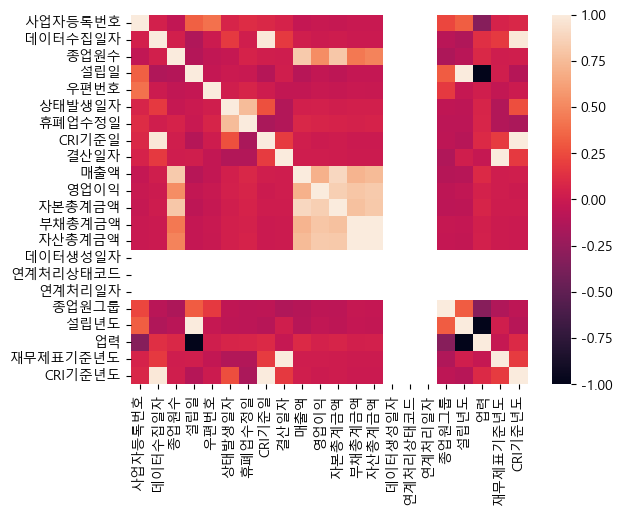

In [33]:
sns.heatmap(Company_Information_d.corr())

#### ✅**종업원수와 매출액은 양의 상관성(0.66)이 있음**

In [34]:
stats.normaltest(Company_Information_d.dropna(subset=['종업원수','매출액']).종업원수)

NormaltestResult(statistic=20450.32784439528, pvalue=0.0)

In [35]:
stats.normaltest(Company_Information_d.dropna(subset=['종업원수','매출액']).매출액)

NormaltestResult(statistic=21150.79353811902, pvalue=0.0)

In [36]:
stats.spearmanr(Company_Information_d.dropna(subset=['종업원수','매출액']).종업원수,Company_Information_d.dropna(subset=['종업원수','매출액']).매출액)

SpearmanrResult(correlation=0.6613362517788565, pvalue=0.0)

#### ✅**종업원수와 자산총계금액과은 양의 상관성(0.62)이 있음**

In [37]:
stats.normaltest(Company_Information_d.dropna(subset=['자산총계금액','종업원수']).종업원수)

NormaltestResult(statistic=20664.280328609027, pvalue=0.0)

In [38]:
stats.normaltest(Company_Information_d.dropna(subset=['자산총계금액','종업원수']).자산총계금액)

NormaltestResult(statistic=30168.66331980833, pvalue=0.0)

In [39]:
stats.spearmanr(Company_Information_d.dropna(subset=['자산총계금액','종업원수']).종업원수,Company_Information_d.dropna(subset=['자산총계금액','종업원수']).자산총계금액)

SpearmanrResult(correlation=0.6222797390326799, pvalue=0.0)

#### ✅**종업원수와 자본총계금액과은 양의 상관성(0.54)이 있음**

In [40]:
stats.normaltest(Company_Information_d.dropna(subset=['자본총계금액','종업원수']).종업원수)

NormaltestResult(statistic=20658.245766999717, pvalue=0.0)

In [41]:
stats.normaltest(Company_Information_d.dropna(subset=['자본총계금액','종업원수']).자본총계금액)

NormaltestResult(statistic=23543.36482502668, pvalue=0.0)

In [42]:
stats.spearmanr(Company_Information_d.dropna(subset=['자본총계금액','종업원수']).종업원수,Company_Information_d.dropna(subset=['자본총계금액','종업원수']).자본총계금액)

SpearmanrResult(correlation=0.5488724637574123, pvalue=0.0)

#### ✅**매출액과 자산총계금액과은 양의 상관성(0.82)이 있음**

In [43]:
stats.spearmanr(Company_Information_d.dropna(subset=['매출액','자산총계금액']).매출액,Company_Information_d.dropna(subset=['매출액','자산총계금액']).자산총계금액)

SpearmanrResult(correlation=0.829568170736648, pvalue=0.0)

#### ✅**부채총계금액과 자산총계금액과은 양의 상관성(0.86)이 있음**

In [44]:
stats.spearmanr(Company_Information_d.dropna(subset=['부채총계금액','자산총계금액']).부채총계금액,Company_Information_d.dropna(subset=['부채총계금액','자산총계금액']).자산총계금액)

SpearmanrResult(correlation=0.8614541515141597, pvalue=0.0)

#### ✅**매출액과 부채총계금액과은 양의 상관성(0.74)이 있음**

In [45]:
stats.spearmanr(Company_Information_d.dropna(subset=['매출액','부채총계금액']).매출액,Company_Information_d.dropna(subset=['매출액','부채총계금액']).부채총계금액)

SpearmanrResult(correlation=0.7452252864268719, pvalue=0.0)

#### ✅**매출액과 자본총계금액과은 양의 상관성(0.72)이 있음**

In [46]:
stats.spearmanr(Company_Information_d.dropna(subset=['매출액','자본총계금액']).매출액,Company_Information_d.dropna(subset=['매출액','자본총계금액']).자본총계금액)

SpearmanrResult(correlation=0.7328272534794524, pvalue=0.0)

#### ✅**설립일과 자산총계금액은 상관성이 있음** : 결측치 대체 필요

In [47]:
stats.normaltest(Company_Information_d.dropna(subset=['자산총계금액','설립일']).설립일)

NormaltestResult(statistic=2756.07611950146, pvalue=0.0)

In [48]:
stats.normaltest(Company_Information_d.dropna(subset=['자산총계금액','설립일']).자산총계금액)

NormaltestResult(statistic=29912.68988819278, pvalue=0.0)

In [49]:
stats.spearmanr(Company_Information_d.dropna(subset=['자산총계금액','설립일']).자산총계금액,Company_Information_d.dropna(subset=['자산총계금액','설립일']).설립일)

SpearmanrResult(correlation=-0.45296461499574503, pvalue=0.0)

#### ✅**CRI등급과 범주형 컬럼 상관분석**

#### ✅ **CRI등급과 상관성이 있음** : 기업명, 기업규모, 기업형태, 산업분류코드, 산업대분류

In [50]:
stats.chi2_contingency(pd.crosstab(Company_Information_d.CRI등급,Company_Information_d.기업명))[1]

4.136564466040213e-23

In [51]:
stats.chi2_contingency(pd.crosstab(Company_Information_d.CRI등급,Company_Information_d.기업규모))[1]

1.0852583812643956e-294

In [52]:
stats.chi2_contingency(pd.crosstab(Company_Information_d.CRI등급,Company_Information_d.기업형태))[1]

0.0

In [53]:
stats.chi2_contingency(pd.crosstab(Company_Information_d.dropna(subset='산업분류코드').CRI등급,Company_Information_d.dropna(subset='산업분류코드').산업분류코드))[1]

0.0

In [54]:
pd.crosstab(Company_Information_d.CRI등급,Company_Information_d.산업대분류).sort_values(by='CRI등급',ascending=True)

산업대분류,10,11,13,14,15,16,17,18,20,21,...,76,84,85,86,87,90,91,94,95,96
CRI등급,,,,,,,,,,,,,,,,,,,,,
A1,2,0,1,1,0,0,0,1,1,3,...,0,1,1,0,0,0,1,7,0,0
A2,3,0,0,3,0,0,0,0,9,0,...,1,0,2,1,2,0,0,6,0,0
A3,4,0,2,3,0,0,0,1,3,2,...,1,1,3,2,0,0,1,4,2,0
B1,3,0,3,3,1,0,1,3,5,0,...,2,0,5,0,0,1,0,1,1,1
B2,5,0,3,5,0,1,2,6,2,0,...,2,0,5,4,0,0,2,4,4,1
B3,6,0,3,4,2,0,0,2,8,0,...,1,1,8,1,0,3,2,12,2,0
C1,3,1,1,4,3,0,1,4,3,0,...,3,0,6,0,0,1,0,7,2,3
C2,5,0,0,1,2,0,0,0,4,2,...,3,0,12,3,0,3,2,1,4,8
C3,6,0,2,9,4,2,1,3,6,5,...,2,0,6,2,0,3,0,0,2,7


In [55]:
Company_Information_d[Company_Information_d.산업대분류 == '15']

,사업자등록번호,데이터수집일자,기업명,기업영문명,대표자명,종업원수,종업원수기준년월,산업분류코드,산업분류코드설명,기업규모,...,데이터생성일자,연계처리상태코드,연계처리일자,산업대분류,종업원그룹,설립년도,업력,성장단계,재무제표기준년도,CRI기준년도
15,1050905695,20220107,파**,PAICOM ***,이**,16.198142,NaN,15,NaN,중소기업,...,20221104,NaN,NaN,15,4,2009.000000,14.000000,창업형,NaN,2021.0
68,2398806715,20211228,(주)**,NaN,안*,3.000000,2020-04,15129.0,가방 및 기타 보호용 케이스 제조업,중소기업,...,20221104,NaN,NaN,15,9,2019.000000,4.000000,창업형,NaN,2021.0
165,2030204979,20211228,판코**,Pan Ko***,박**,20.171137,NaN,15110.0,모피 및 가죽 제조업,중소기업,...,20221104,NaN,NaN,15,3,2007.184136,15.815864,자립성장형,2020.0,2021.0
1202,1052204614,20220303,대*,Daes***,박**,13.968341,NaN,15121.0,핸드백 및 지갑 제조업,중소기업,...,20221104,NaN,NaN,15,5,2009.214840,13.785160,창업형,NaN,2022.0
1384,8468602325,20220225,(주)조이앤마리오***,"Joy&Mrio Korea Co., L***",신**,7.000000,2021-07,15219.0,기타 신발 제조업,중소기업,...,20221104,NaN,NaN,15,7,2015.000000,8.000000,자립성장형,2020.0,2022.0
1405,8651202214,20220225,스튜디오오브***,Studio Of Jek T ***,김**,1.000000,2016-05,15000.0,"가죽, 가방 및 신발 제조업",중소기업,...,20221104,NaN,NaN,15,10,2015.000000,8.000000,정체형,2019.0,2022.0
1733,7328808707,20220215,(주)에스***,S**,이**,3.000000,2021-06,15129.0,가방 및 기타 보호용 케이스 제조업,중소기업,...,20221104,NaN,NaN,15,9,2015.000000,8.000000,자립성장형,2020.0,2022.0
2324,3768702930,20220124,(주)엠비***,AMBITIONEM I***,김**,4.000000,2020-04,15129.0,가방 및 기타 보호용 케이스 제조업,중소기업,...,20221104,NaN,NaN,15,9,2018.000000,5.000000,창업형,2020.0,2022.0
3555,2208808665,20210703,(주)신발***,"Shoes Research Institute Co., L***",박**,10.000000,2020-04,15219.0,기타 신발 제조업,중소기업,...,20221104,NaN,NaN,15,5,2014.000000,9.000000,자립성장형,2019.0,2021.0
4003,1342008942,20211129,화성이**,HWASEONG ENG ***,박**,9.000000,2008-03,15129.0,가방 및 기타 보호용 케이스 제조업,중소기업,...,20221104,NaN,NaN,15,6,2003.000000,20.000000,자립성장형,2018.0,2021.0


In [56]:
stats.chi2_contingency(pd.crosstab(Company_Information_d.CRI등급,Company_Information_d.산업대분류))[1]

0.0

In [57]:
stats.chi2_contingency(pd.crosstab(Company_Information_d.dropna(subset='종업원그룹').CRI등급,Company_Information_d.dropna(subset='종업원그룹').종업원그룹))[1]

0.0

In [58]:
stats.chi2_contingency(pd.crosstab(Company_Information_d.dropna(subset='성장단계').CRI등급,Company_Information_d.dropna(subset='성장단계').성장단계))[1]

0.0

In [59]:
pd.crosstab(Company_Information_d.dropna(subset='성장단계').CRI등급,Company_Information_d.dropna(subset='성장단계').성장단계)

성장단계,성숙형,성장보육형,자립성장형,정체형,창업형
CRI등급,,,,,
A1,23,18,93,57,12
A2,65,33,277,54,48
A3,129,63,544,119,131
B1,93,92,711,142,169
B2,59,156,1098,226,199
B3,23,189,715,493,173
C1,8,60,310,267,204
C2,4,94,404,368,705
C3,8,74,310,280,407


#### ✅ **CRI등급간 평균의 차이가 있음** : 매출액, 부채총계금액, 자본총계금액, 자산총계금액

In [60]:
stats.normaltest(Company_Information_d.dropna(subset='자산총계금액').자산총계금액)

NormaltestResult(statistic=30168.66331980833, pvalue=0.0)

In [61]:
stats.kruskal(Company_Information_d.dropna(subset='자산총계금액').loc[Company_Information_d.CRI등급.isin(['A1','A2','A3'])].자산총계금액,
Company_Information_d.dropna(subset='자산총계금액').loc[Company_Information_d.CRI등급.isin(['B1','B2','B3'])].자산총계금액,
Company_Information_d.dropna(subset='자산총계금액').loc[Company_Information_d.CRI등급.isin(['C1','C2','C3'])].자산총계금액,
Company_Information_d.dropna(subset='자산총계금액').loc[Company_Information_d.CRI등급.isin(['D'])].자산총계금액)

KruskalResult(statistic=641.6551877398156, pvalue=9.388852492055215e-139)

In [62]:
print(Company_Information_d.dropna(subset='자산총계금액').loc[Company_Information_d.CRI등급.isin(['A1','A2','A3'])].자산총계금액.mean())
print(Company_Information_d.dropna(subset='자산총계금액').loc[Company_Information_d.CRI등급.isin(['B1','B2','B3'])].자산총계금액.mean())
print(Company_Information_d.dropna(subset='자산총계금액').loc[Company_Information_d.CRI등급.isin(['C1','C2','C3'])].자산총계금액.mean())
print(Company_Information_d.dropna(subset='자산총계금액').loc[Company_Information_d.CRI등급.isin(['D'])].자산총계금액.mean())

586959267.12
9778218.831759864
5822144.530032467
422051939.6043956


In [63]:
stats.kruskal(Company_Information_d.dropna(subset='매출액').loc[Company_Information_d.CRI등급.isin(['A1','A2','A3'])].매출액,
Company_Information_d.dropna(subset='매출액').loc[Company_Information_d.CRI등급.isin(['B1','B2','B3'])].매출액,
Company_Information_d.dropna(subset='매출액').loc[Company_Information_d.CRI등급.isin(['C1','C2','C3'])].매출액,
Company_Information_d.dropna(subset='매출액').loc[Company_Information_d.CRI등급.isin(['D'])].매출액)

KruskalResult(statistic=862.1544482946309, pvalue=1.4314485235750096e-186)

In [64]:
print(Company_Information_d.dropna(subset='매출액').loc[Company_Information_d.CRI등급.isin(['A1','A2','A3'])].매출액.mean())
print(Company_Information_d.dropna(subset='매출액').loc[Company_Information_d.CRI등급.isin(['B1','B2','B3'])].매출액.mean())
print(Company_Information_d.dropna(subset='매출액').loc[Company_Information_d.CRI등급.isin(['C1','C2','C3'])].매출액.mean())
print(Company_Information_d.dropna(subset='매출액').loc[Company_Information_d.CRI등급.isin(['D'])].매출액.mean())

151454542.3199733
11103883.586307356
4447606.207382829
101782629.91208792


In [65]:
stats.kruskal(Company_Information_d.dropna(subset='자본총계금액').loc[Company_Information_d.CRI등급.isin(['A1','A2','A3'])].자본총계금액,
Company_Information_d.dropna(subset='자본총계금액').loc[Company_Information_d.CRI등급.isin(['B1','B2','B3'])].자본총계금액,
Company_Information_d.dropna(subset='자본총계금액').loc[Company_Information_d.CRI등급.isin(['C1','C2','C3'])].자본총계금액,
Company_Information_d.dropna(subset='자본총계금액').loc[Company_Information_d.CRI등급.isin(['D'])].자본총계금액)

KruskalResult(statistic=1632.6039207753972, pvalue=0.0)

In [66]:
print(Company_Information_d.dropna(subset='자본총계금액').loc[Company_Information_d.CRI등급.isin(['A1','A2','A3'])].자본총계금액.mean())
print(Company_Information_d.dropna(subset='자본총계금액').loc[Company_Information_d.CRI등급.isin(['B1','B2','B3'])].자본총계금액.mean())
print(Company_Information_d.dropna(subset='자본총계금액').loc[Company_Information_d.CRI등급.isin(['C1','C2','C3'])].자본총계금액.mean())
print(Company_Information_d.dropna(subset='자본총계금액').loc[Company_Information_d.CRI등급.isin(['D'])].자본총계금액.mean())

128373556.08933334
4700607.966836117
-160459.6896831844
50810547.20879121


In [67]:
stats.kruskal(Company_Information_d.dropna(subset='부채총계금액').loc[Company_Information_d.CRI등급.isin(['A1','A2','A3'])].부채총계금액,
Company_Information_d.dropna(subset='부채총계금액').loc[Company_Information_d.CRI등급.isin(['B1','B2','B3'])].부채총계금액,
Company_Information_d.dropna(subset='부채총계금액').loc[Company_Information_d.CRI등급.isin(['C1','C2','C3'])].부채총계금액,
Company_Information_d.dropna(subset='부채총계금액').loc[Company_Information_d.CRI등급.isin(['D'])].부채총계금액)

KruskalResult(statistic=60.93935512435657, pvalue=3.702841792246871e-13)

In [68]:
print(Company_Information_d.dropna(subset='부채총계금액').loc[Company_Information_d.CRI등급.isin(['A1','A2','A3'])].부채총계금액.mean())
print(Company_Information_d.dropna(subset='부채총계금액').loc[Company_Information_d.CRI등급.isin(['B1','B2','B3'])].부채총계금액.mean())
print(Company_Information_d.dropna(subset='부채총계금액').loc[Company_Information_d.CRI등급.isin(['C1','C2','C3'])].부채총계금액.mean())
print(Company_Information_d.dropna(subset='부채총계금액').loc[Company_Information_d.CRI등급.isin(['D'])].부채총계금액.mean())

458585711.0173333
5077609.89808763
5994637.598617324
371241392.3296703


- ##### **없음** : 전화번호, 주소, 이메일주소

In [69]:
stats.chi2_contingency(pd.crosstab(Company_Information_d.dropna(subset='전화번호').CRI등급,Company_Information_d.dropna(subset='전화번호').전화번호))[1]

0.5601550572818149

In [70]:
stats.chi2_contingency(pd.crosstab(Company_Information_d.dropna(subset='주소').CRI등급,Company_Information_d.dropna(subset='주소').주소))[1]

0.9999997671875888

In [71]:
stats.chi2_contingency(pd.crosstab(Company_Information_d.dropna(subset='이메일주소').CRI등급,Company_Information_d.dropna(subset='이메일주소').이메일주소))[1]

0.40727379523881774

#### ✅**CRI를 제외한 범주형 변수끼리의 상관분석**

- ##### 기업명, 기업규모는 상관성이 ***있음***

In [72]:
stats.chi2_contingency(pd.crosstab(Company_Information_d.기업명,Company_Information_d.기업규모))[1]

0.0

- ##### 기업명, 전화번호는 상관성이 ***없음***

In [73]:
stats.chi2_contingency(pd.crosstab(Company_Information_d.dropna(subset='전화번호').기업명,Company_Information_d.dropna(subset='전화번호').전화번호))[1]

0.46415133747472687

- ##### 기업규모, 기업형태는 상관성이 ***있음***

In [74]:
stats.chi2_contingency(pd.crosstab(Company_Information_d.기업규모,Company_Information_d.기업형태))[1]

0.0

- ##### 기업규모, 주소 상관성이 ***없음***

In [75]:
stats.chi2_contingency(pd.crosstab(Company_Information_d.dropna(subset='주소').기업규모,Company_Information_d.dropna(subset='주소').주소))[1]

1.0

- ##### 기업규모, 휴폐업구분 상관성이 ***없음***

In [76]:
stats.chi2_contingency(pd.crosstab(Company_Information_d.dropna(subset='휴폐업구분').기업규모,Company_Information_d.dropna(subset='휴폐업구분').휴폐업구분))[1]

0.27004558221152847

- ##### 기업규모, 설립일이 상관성이 ***있음***

In [77]:
stats.chi2_contingency(pd.crosstab(Company_Information_d.dropna(subset='설립일').기업규모,Company_Information_d.dropna(subset='설립일').설립일))[1]

6.5504384385023e-92

- ##### 기업규모, 종업원수가 상관성이 ***있음***

In [78]:
stats.chi2_contingency(pd.crosstab(Company_Information_d.기업규모,Company_Information_d.종업원수))[1]

0.0

In [79]:
stats.chi2_contingency(pd.crosstab(Company_Information_d.기업규모,Company_Information_d.산업대분류))[1]

0.0

In [80]:
stats.chi2_contingency(pd.crosstab(Company_Information_d.기업규모,Company_Information_d.성장단계))[1]

0.0

#### ✅**연속헝 -범주형 변수끼리의 상관분석**

- ##### 종업원그룹마다 자산총계금액의 차이가 ***있음***

In [81]:
Company_Information_d.종업원그룹

0       1
1       8
2       5
3       3
4       9
       ..
9869    1
9870    7
9871    9
9872    3
9873    8
Name: 종업원그룹, Length: 9874, dtype: int64

In [82]:
a = Company_Information_d.dropna(subset='자산총계금액')
stats.kruskal(a.loc[Company_Information_d.종업원그룹 == 1].자산총계금액,
a.loc[Company_Information_d.종업원그룹 == 2].자산총계금액,
a.loc[Company_Information_d.종업원그룹 == 3].자산총계금액,
a.loc[Company_Information_d.종업원그룹 == 4].자산총계금액,
a.loc[Company_Information_d.종업원그룹 == 5].자산총계금액,
a.loc[Company_Information_d.종업원그룹 == 6].자산총계금액,
a.loc[Company_Information_d.종업원그룹 == 7].자산총계금액,
a.loc[Company_Information_d.종업원그룹 == 8].자산총계금액,
a.loc[Company_Information_d.종업원그룹 == 9].자산총계금액,
a.loc[Company_Information_d.종업원그룹 == 10].자산총계금액)

KruskalResult(statistic=3346.3041643327037, pvalue=0.0)

- ##### 종업원그룹마다 매출액의 차이가 ***있음***

In [83]:
stats.kruskal(Company_Information_d.dropna(subset='매출액').loc[Company_Information_d.종업원그룹 == 1].매출액,
Company_Information_d.dropna(subset='매출액').loc[Company_Information_d.종업원그룹 == 2].매출액,
Company_Information_d.dropna(subset='매출액').loc[Company_Information_d.종업원그룹 == 3].매출액,
Company_Information_d.dropna(subset='매출액').loc[Company_Information_d.종업원그룹 == 4].매출액,
Company_Information_d.dropna(subset='매출액').loc[Company_Information_d.종업원그룹 == 5].매출액,
Company_Information_d.dropna(subset='매출액').loc[Company_Information_d.종업원그룹 == 6].매출액,
Company_Information_d.dropna(subset='매출액').loc[Company_Information_d.종업원그룹 == 7].매출액,
Company_Information_d.dropna(subset='매출액').loc[Company_Information_d.종업원그룹 == 8].매출액,
Company_Information_d.dropna(subset='매출액').loc[Company_Information_d.종업원그룹 == 9].매출액,
Company_Information_d.dropna(subset='매출액').loc[Company_Information_d.종업원그룹 == 10].매출액)

KruskalResult(statistic=3688.063094107311, pvalue=0.0)

- ##### 산업대분류마다 자산총계금액의 차이가 ***있음***

In [84]:
Company_Information_d.산업대분류.unique()

array(['96', '46', '50', '73', '68', '75', '59', '56', '41', '63', '71',
       '15', '47', '26', '58', '94', '62', '13', '85', '42', '20', '10',
       '28', '22', '70', '61', '95', '60', '29', '45', '14', '52', '21',
       '33', '34', '86', '25', '31', '74', '23', '76', '27', '24', '91',
       '66', '72', '18', '90', '11', '35', '39', '87', '30', '64', '55',
       '17', '49', '38', '84', '65', '16', '32'], dtype=object)

In [85]:
c = Company_Information_d.dropna(subset='자산총계금액').loc[Company_Information_d.산업대분류.isin(['42','62','58','41','46','26','47','63','59','71'])]
stats.kruskal(c.loc[Company_Information_d.산업대분류 == '42'].자산총계금액,
c.loc[Company_Information_d.산업대분류 == '62'].자산총계금액,
c.loc[Company_Information_d.산업대분류 == '58'].자산총계금액,
c.loc[Company_Information_d.산업대분류 == '41'].자산총계금액,
c.loc[Company_Information_d.산업대분류 == '46'].자산총계금액,
c.loc[Company_Information_d.산업대분류 == '26'].자산총계금액,
c.loc[Company_Information_d.산업대분류 == '47'].자산총계금액,
c.loc[Company_Information_d.산업대분류 == '63'].자산총계금액,
c.loc[Company_Information_d.산업대분류 == '59'].자산총계금액,
c.loc[Company_Information_d.산업대분류 == '71'].자산총계금액
)

KruskalResult(statistic=417.9711081518081, pvalue=1.9988908213296507e-84)

- ##### 성장단계마다 자산총계금액의 차이가 ***있음***

In [86]:
Company_Information_d.성장단계.value_counts()

자립성장형    4505
창업형      2102
정체형      2038
성장보육형     794
성숙형       435
Name: 성장단계, dtype: int64

In [87]:
a = Company_Information_d.dropna(subset='자산총계금액')
stats.kruskal(a.loc[Company_Information_d.성장단계 == '자립성장형'].자산총계금액,
a.loc[Company_Information_d.성장단계 == '창업형'].자산총계금액,
a.loc[Company_Information_d.성장단계 == '정체형'].자산총계금액,
a.loc[Company_Information_d.성장단계 == '성장보육형'].자산총계금액,
a.loc[Company_Information_d.성장단계 == '성숙형'].자산총계금액)

KruskalResult(statistic=3883.6542919933954, pvalue=0.0)

- ##### 성장단계마다 매출액의 차이가 ***있음***

In [88]:
a = Company_Information_d.dropna(subset='매출액')
stats.kruskal(a.loc[Company_Information_d.성장단계 == '자립성장형'].매출액,
a.loc[Company_Information_d.성장단계 == '창업형'].매출액,
a.loc[Company_Information_d.성장단계 == '정체형'].매출액,
a.loc[Company_Information_d.성장단계 == '성장보육형'].매출액,
a.loc[Company_Information_d.성장단계 == '성숙형'].매출액)

KruskalResult(statistic=5710.512341358424, pvalue=0.0)

#### ✅**머신러닝을 돌릴 때에 필요없는 컬럼 지우고 결측치 처리**
- ##### 삭제 : 데이터수집일자, 데이터생성일자, 기업명, 기업영문명, 대표자명, 업태명, 이메일주소, 전화번호, 팩스전화번호, 우편번호, 주소, 상세주보, 휴폐업구분, 휴폐업수정일, 작업구분코드, 연계처리상태코드, 연계처리일자
- ##### **생성**
   - **결측치 처리 필요 없음 : 사업자등록번호, 기업규모, 기업형태, CRI등급, 성장단계**
   - **결측치 처리 필요 : 종업원수, 산업분류코드, 매출액, 영업이익, 자본총계금액, 부채총계금액, 자산총계금액**

<br>

- ##### **날짜 : 종업원수기준년월, 설립일, 상태발생일자, 결산일자, CRI기준일**
- ##### **남은 컬럼 : '사업자등록번호','종업원수','산업분류코드','기업규모','기업형태','주소','CRI등급','매출액', '영업이익', '자본총계금액', '부채총계금액', '자산총계금액'**

In [89]:
Company_Information_d.isnull().sum()

사업자등록번호        0
데이터수집일자        0
기업명            0
기업영문명        882
대표자명           0
종업원수           0
종업원수기준년월     658
산업분류코드         0
산업분류코드설명      25
기업규모           0
기업형태           0
업태명         1222
설립일          462
이메일주소       5799
전화번호         547
팩스전화번호      2006
우편번호         870
주소            84
상세주보         724
휴폐업구분       9640
상태발생일자      9744
휴폐업수정일      9640
CRI등급          0
CRI기준일       633
결산일자        1656
매출액         1729
영업이익        1665
자본총계금액      1660
부채총계금액      1663
자산총계금액      1658
작업구분코드         0
데이터생성일자        0
연계처리상태코드    9874
연계처리일자      9874
산업대분류          0
종업원그룹          0
설립년도           0
업력             0
성장단계           0
재무제표기준년도    1656
CRI기준년도      633
dtype: int64

In [90]:
Company_Information_d.columns

Index(['사업자등록번호', '데이터수집일자', '기업명', '기업영문명', '대표자명', '종업원수', '종업원수기준년월',
       '산업분류코드', '산업분류코드설명', '기업규모', '기업형태', '업태명', '설립일', '이메일주소', '전화번호',
       '팩스전화번호', '우편번호', '주소', '상세주보', '휴폐업구분', '상태발생일자', '휴폐업수정일', 'CRI등급',
       'CRI기준일', '결산일자', '매출액', '영업이익', '자본총계금액', '부채총계금액', '자산총계금액', '작업구분코드',
       '데이터생성일자', '연계처리상태코드', '연계처리일자', '산업대분류', '종업원그룹', '설립년도', '업력', '성장단계',
       '재무제표기준년도', 'CRI기준년도'],
      dtype='object')

In [91]:
len(Company_Information_d.사업자등록번호.unique())

9874

In [92]:
Company_Information_d.isnull().sum()

사업자등록번호        0
데이터수집일자        0
기업명            0
기업영문명        882
대표자명           0
종업원수           0
종업원수기준년월     658
산업분류코드         0
산업분류코드설명      25
기업규모           0
기업형태           0
업태명         1222
설립일          462
이메일주소       5799
전화번호         547
팩스전화번호      2006
우편번호         870
주소            84
상세주보         724
휴폐업구분       9640
상태발생일자      9744
휴폐업수정일      9640
CRI등급          0
CRI기준일       633
결산일자        1656
매출액         1729
영업이익        1665
자본총계금액      1660
부채총계금액      1663
자산총계금액      1658
작업구분코드         0
데이터생성일자        0
연계처리상태코드    9874
연계처리일자      9874
산업대분류          0
종업원그룹          0
설립년도           0
업력             0
성장단계           0
재무제표기준년도    1656
CRI기준년도      633
dtype: int64

#### ✅**CRI 등급 'NG'(신용등급평가 불응) 삭제 : 9881 -> 9844**

In [93]:
Company_Information_d.CRI등급.value_counts()

B2    1738
B3    1593
C2    1575
B1    1207
C3    1079
A3     986
C1     849
A2     477
A1     203
D      130
NG      37
Name: CRI등급, dtype: int64

In [94]:
print(len(Company_Information_d.사업자등록번호.unique()))
Company_Information_d = Company_Information_d[Company_Information_d.CRI등급!='NG']
print(len(Company_Information_d.사업자등록번호.unique()))

9874
9837


#### **✅기업형태에서 폐업인 곳의 신용등급 알아보기 : 모두 D**

In [95]:
Company_Information_d[Company_Information_d.기업형태 == '폐업'].CRI등급.value_counts()

D    128
Name: CRI등급, dtype: int64

In [96]:
len(Company_Information_d[Company_Information_d.기업형태 == '폐업'].사업자등록번호.unique().tolist())

128

In [97]:
len(Company_Information_d[Company_Information_d.CRI등급 == 'D'].사업자등록번호.unique().tolist())

130

In [98]:
Company_Information_d.기업규모.value_counts()

중소기업         9322
중견기업          306
대기업           115
기타(비영리법인)      90
중견기업(하)         4
Name: 기업규모, dtype: int64

In [99]:
Company_Information_d.isnull().sum()

사업자등록번호        0
데이터수집일자        0
기업명            0
기업영문명        880
대표자명           0
종업원수           0
종업원수기준년월     652
산업분류코드         0
산업분류코드설명      25
기업규모           0
기업형태           0
업태명         1217
설립일          457
이메일주소       5768
전화번호         543
팩스전화번호      1997
우편번호         868
주소            84
상세주보         723
휴폐업구분       9604
상태발생일자      9707
휴폐업수정일      9604
CRI등급          0
CRI기준일       632
결산일자        1650
매출액         1719
영업이익        1658
자본총계금액      1653
부채총계금액      1656
자산총계금액      1651
작업구분코드         0
데이터생성일자        0
연계처리상태코드    9837
연계처리일자      9837
산업대분류          0
종업원그룹          0
설립년도           0
업력             0
성장단계           0
재무제표기준년도    1650
CRI기준년도      632
dtype: int64

#### ✅**매출액, 영업이익, 자본총계금액, 부채총계금액, 자산총계금액의 결측치 처리**

In [100]:
mc = Company_Information_d[Company_Information_d.매출액.isna()].사업자등록번호.unique().tolist()
y = Company_Information_d[Company_Information_d.영업이익.isna()].사업자등록번호.unique().tolist()
jb = Company_Information_d[Company_Information_d.자본총계금액.isna()].사업자등록번호.unique().tolist()
bc = Company_Information_d[Company_Information_d.부채총계금액.isna()].사업자등록번호.unique().tolist()
js = Company_Information_d[Company_Information_d.자산총계금액.isna()].사업자등록번호.unique().tolist()

mc_y = []
for i in range(len(js)):
    if js[i] in jb:
        mc_y.append(js[i])
len(mc_y)

1651

In [101]:
1658/9844

0.1684274685087363

- **자산총계가 없는 기업들 중 중소기업 비율**

In [102]:
1573/1658

0.9487334137515079

In [103]:
Company_Information_d[Company_Information_d.자산총계금액.isna()].기업규모.value_counts()

중소기업         1568
중견기업           59
기타(비영리법인)      12
대기업            12
Name: 기업규모, dtype: int64

In [104]:
Company_Information_d[['매출액','영업이익','자본총계금액','부채총계금액','자산총계금액']].describe()

,매출액,영업이익,자본총계금액,부채총계금액,자산총계금액
count,8.118000e+03,8.179000e+03,8.184000e+03,8.181000e+03,8.186000e+03
mean,3.602485e+07,2.048086e+06,2.641829e+07,9.257767e+07,1.189330e+08
std,4.715084e+08,4.424243e+07,5.055788e+08,4.552481e+09,4.955234e+09
min,-6.949763e+06,-1.385436e+08,-1.522789e+09,0.000000e+00,-5.500000e+04
25%,7.276690e+05,1.210500e+03,2.862150e+05,1.914360e+05,6.327788e+05
50%,2.015524e+06,6.662700e+04,8.416095e+05,5.760490e+05,1.631192e+06
75%,6.336418e+06,2.626395e+05,2.572004e+06,2.121045e+06,5.127076e+06
max,2.347011e+10,3.169620e+09,3.045981e+10,3.916664e+11,4.221262e+11


In [105]:
Company_Information_d[['매출액','영업이익','자본총계금액','부채총계금액','자산총계금액']].isnull().sum()

매출액       1719
영업이익      1658
자본총계금액    1653
부채총계금액    1656
자산총계금액    1651
dtype: int64

#### ✅**아예 자산총계금액이 없는 데이터가 1650개는 1) 결측치 처리하기 2) 비재무요소만 고려하기**

In [106]:
Company_Information_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9837 entries, 0 to 9873
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사업자등록번호   9837 non-null   int64  
 1   데이터수집일자   9837 non-null   int64  
 2   기업명       9837 non-null   object 
 3   기업영문명     8957 non-null   object 
 4   대표자명      9837 non-null   object 
 5   종업원수      9837 non-null   float64
 6   종업원수기준년월  9185 non-null   object 
 7   산업분류코드    9837 non-null   object 
 8   산업분류코드설명  9812 non-null   object 
 9   기업규모      9837 non-null   object 
 10  기업형태      9837 non-null   object 
 11  업태명       8620 non-null   object 
 12  설립일       9380 non-null   float64
 13  이메일주소     4069 non-null   object 
 14  전화번호      9294 non-null   object 
 15  팩스전화번호    7840 non-null   object 
 16  우편번호      8969 non-null   float64
 17  주소        9753 non-null   object 
 18  상세주보      9114 non-null   object 
 19  휴폐업구분     233 non-null    object 
 20  상태발생일자    130 non-null    floa

<AxesSubplot:>

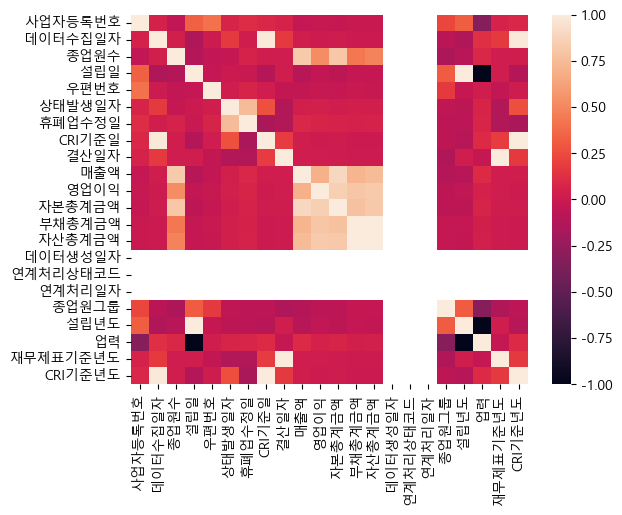

In [107]:
sns.heatmap(Company_Information_d.corr())

#### ✅**자산총계의 결측치 처리**
  - #### **대치**
  1) ##### **종업원수에 따라 자산총계 결측치 처리**
  2) ##### **자산총계에 따라 나머지 결측치 처리**
  
  - #### **제외 -> 비재무지표로만 CRI 예측하기** 

<br>

#### ✅**재무적 요소 머신러닝 : 자산총계 대치한 경우, 자산총계 결측치 제외한 경우**
#### ✅**비재무적 요소 머신러닝**
#### ✅**재무적 + 비재무적 머신러닝**

#### ✅**종업원그룹으로 자산총계 결측치 채우기 : df**
#### ✅**종업원그룹으로 자산총계 아예없앤거 : df_del_null**

In [108]:
df = Company_Information_d[['사업자등록번호','종업원수','종업원그룹','업력','성장단계','산업대분류','기업규모','기업형태','CRI등급',
                                               '매출액', '영업이익', '자본총계금액', '부채총계금액', '자산총계금액']]
for i in range(1,11):
    df.loc[(df.자산총계금액.isnull()) & (df.종업원그룹 == i),'자산총계금액'] = df[df.종업원그룹 == i].자산총계금액.mean()

In [109]:
df.자산총계금액.isnull().sum()

0

- #### **자산총계등급별로 매출액, 영업이익, 자본총계금액, 부채총계금액의 결측치 처리 - 같은 자산총계등급의 평균으로 대체**

In [110]:
df['자산총계그룹화'] = 10
df.loc[df.자산총계금액 >= df.자산총계금액.quantile(q=0.1),'자산총계그룹화'] = 9
df.loc[df.자산총계금액 >= df.자산총계금액.quantile(q=0.2),'자산총계그룹화'] = 8
df.loc[df.자산총계금액 >= df.자산총계금액.quantile(q=0.3),'자산총계그룹화'] = 7
df.loc[df.자산총계금액 >= df.자산총계금액.quantile(q=0.4),'자산총계그룹화'] = 6
df.loc[df.자산총계금액 >= df.자산총계금액.quantile(q=0.5),'자산총계그룹화'] = 5
df.loc[df.자산총계금액 >= df.자산총계금액.quantile(q=0.6),'자산총계그룹화'] = 4
df.loc[df.자산총계금액 >= df.자산총계금액.quantile(q=0.7),'자산총계그룹화'] = 3
df.loc[df.자산총계금액 >= df.자산총계금액.quantile(q=0.8),'자산총계그룹화'] = 2
df.loc[df.자산총계금액 >= df.자산총계금액.quantile(q=0.9),'자산총계그룹화'] = 1
df['자산총계그룹화'].astype(object).value_counts()

C:\Users\zlata\AppData\Local\Temp\ipykernel_97012\2270305652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['자산총계그룹화'] = 10


2     1009
1     1005
4      984
7      984
10     984
5      984
9      984
8      983
6      983
3      937
Name: 자산총계그룹화, dtype: int64

In [111]:
for i in range(1,11):
    df.loc[(df.매출액.isnull()) & (df.자산총계그룹화 == i),'매출액'] = df[df.자산총계그룹화 == i].매출액.mean()
    df.loc[(df.영업이익.isnull()) & (df.자산총계그룹화 == i),'영업이익'] = df[df.자산총계그룹화 == i].영업이익.mean()
    df.loc[(df.자본총계금액.isnull()) & (df.자산총계그룹화 == i),'자본총계금액'] = df[df.자산총계그룹화 == i].자본총계금액.mean()
    df.loc[(df.부채총계금액.isnull()) & (df.자산총계그룹화 == i),'부채총계금액'] = df[df.자산총계그룹화 == i].부채총계금액.mean()

In [112]:
df.isnull().sum()

사업자등록번호    0
종업원수       0
종업원그룹      0
업력         0
성장단계       0
산업대분류      0
기업규모       0
기업형태       0
CRI등급      0
매출액        0
영업이익       0
자본총계금액     0
부채총계금액     0
자산총계금액     0
자산총계그룹화    0
dtype: int64

- #### **df_del_null**

In [113]:
df_del_null = Company_Information_d[['사업자등록번호','종업원수','종업원그룹','업력','성장단계','산업대분류','기업규모','기업형태','CRI등급',
                                               '매출액', '영업이익', '자본총계금액', '부채총계금액', '자산총계금액']]
df_del_null[df_del_null.자산총계금액.isna()][['사업자등록번호', '종업원수', '종업원그룹', '성장단계', '산업대분류','기업규모','기업형태','CRI등급']].to_csv("자산총계null.csv",encoding='CP949')
df_del_null = df_del_null[~df_del_null.자산총계금액.isna()]
df_del_null.isnull().sum()

사업자등록번호     0
종업원수        0
종업원그룹       0
업력          0
성장단계        0
산업대분류       0
기업규모        0
기업형태        0
CRI등급       0
매출액        68
영업이익        7
자본총계금액      2
부채총계금액      5
자산총계금액      0
dtype: int64

In [114]:
df_del_null.shape

(8186, 14)

- #### **자산총계등급별로 매출액, 영업이익, 자본총계금액, 부채총계금액의 결측치 처리 - 같은 자산총계등급의 평균으로 대체**

In [115]:
df_del_null['자산총계그룹화'] = 10
df_del_null.loc[df_del_null.자산총계금액 >= df_del_null.자산총계금액.quantile(q=0.1),'자산총계그룹화'] = 9
df_del_null.loc[df_del_null.자산총계금액 >= df_del_null.자산총계금액.quantile(q=0.2),'자산총계그룹화'] = 8
df_del_null.loc[df_del_null.자산총계금액 >= df_del_null.자산총계금액.quantile(q=0.3),'자산총계그룹화'] = 7
df_del_null.loc[df_del_null.자산총계금액 >= df_del_null.자산총계금액.quantile(q=0.4),'자산총계그룹화'] = 6
df_del_null.loc[df_del_null.자산총계금액 >= df_del_null.자산총계금액.quantile(q=0.5),'자산총계그룹화'] = 5
df_del_null.loc[df_del_null.자산총계금액 >= df_del_null.자산총계금액.quantile(q=0.6),'자산총계그룹화'] = 4
df_del_null.loc[df_del_null.자산총계금액 >= df_del_null.자산총계금액.quantile(q=0.7),'자산총계그룹화'] = 3
df_del_null.loc[df_del_null.자산총계금액 >= df_del_null.자산총계금액.quantile(q=0.8),'자산총계그룹화'] = 2
df_del_null.loc[df_del_null.자산총계금액 >= df_del_null.자산총계금액.quantile(q=0.9),'자산총계그룹화'] = 1
df_del_null['자산총계그룹화'].astype(object).value_counts()

1     819
6     819
2     819
10    819
4     819
8     819
7     818
3     818
5     818
9     818
Name: 자산총계그룹화, dtype: int64

In [116]:
for i in range(1,11):
    df_del_null.loc[(df_del_null.매출액.isnull()) & (df_del_null.자산총계그룹화 == i),'매출액'] = df_del_null[df_del_null.자산총계그룹화 == i].매출액.mean()
    df_del_null.loc[(df_del_null.영업이익.isnull()) & (df_del_null.자산총계그룹화 == i),'영업이익'] = df_del_null[df_del_null.자산총계그룹화 == i].영업이익.mean()
    df_del_null.loc[(df_del_null.자본총계금액.isnull()) & (df_del_null.자산총계그룹화 == i),'자본총계금액'] = df_del_null[df_del_null.자산총계그룹화 == i].자본총계금액.mean()
    df_del_null.loc[(df_del_null.부채총계금액.isnull()) & (df_del_null.자산총계그룹화 == i),'부채총계금액'] = df_del_null[df_del_null.자산총계그룹화 == i].부채총계금액.mean()

In [117]:
df_del_null.isnull().sum()

사업자등록번호    0
종업원수       0
종업원그룹      0
업력         0
성장단계       0
산업대분류      0
기업규모       0
기업형태       0
CRI등급      0
매출액        0
영업이익       0
자본총계금액     0
부채총계금액     0
자산총계금액     0
자산총계그룹화    0
dtype: int64

In [118]:
df[['사업자등록번호', '종업원수', '종업원그룹', '성장단계', '산업대분류','기업규모','기업형태','CRI등급','자산총계그룹화']].reset_index(drop=True,col_level=0,col_fill='').to_csv("자산총계결측치.csv",encoding='CP949')

- #### **CRI등급 자산총계금액**

In [119]:
stats.kruskal(df.loc[df.CRI등급.isin(['A1','A2','A3'])].자산총계금액,
df.loc[df.CRI등급.isin(['B1','B2','B3'])].자산총계금액,
df.loc[df.CRI등급.isin(['C1','C2','C3'])].자산총계금액,
df.loc[df.CRI등급.isin(['D'])].자산총계금액)

KruskalResult(statistic=367.4165761515014, pvalue=2.5246482441821666e-79)

In [120]:
print(df.loc[df.CRI등급.isin(['A1','A2','A3'])].자산총계금액.mean())
print(df.loc[df.CRI등급.isin(['B1','B2','B3'])].자산총계금액.mean())
print(df.loc[df.CRI등급.isin(['C1','C2','C3'])].자산총계금액.mean())
print(df.loc[df.CRI등급.isin(['D'])].자산총계금액.mean())

574233054.5564666
24762646.4469297
11058312.270305406
513020262.0091923


In [121]:
print(df.loc[df.CRI등급.isin(['A1','A2','A3'])].부채총계금액.mean())
print(df.loc[df.CRI등급.isin(['B1','B2','B3'])].부채총계금액.mean())
print(df.loc[df.CRI등급.isin(['C1','C2','C3'])].부채총계금액.mean())
print(df.loc[df.CRI등급.isin(['D'])].부채총계금액.mean())

462423390.8549849
26386930.2091396
14301550.398003202
456203948.1091992


In [122]:
df.columns

Index(['사업자등록번호', '종업원수', '종업원그룹', '업력', '성장단계', '산업대분류', '기업규모', '기업형태',
       'CRI등급', '매출액', '영업이익', '자본총계금액', '부채총계금액', '자산총계금액', '자산총계그룹화'],
      dtype='object')

<AxesSubplot:>

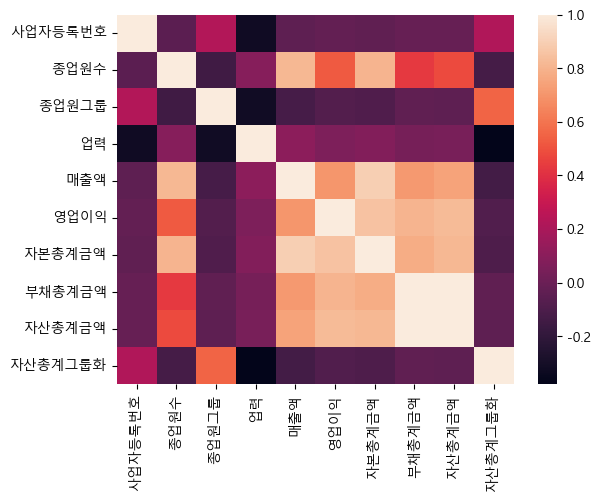

In [123]:
sns.heatmap(df.corr())

---
> # **재무제표정보 데이터**
---

In [124]:
Financial_Statements = pd.read_csv("재무제표정보.csv",index_col=0)
Financial_Statements = Financial_Statements.drop_duplicates()
Financial_Statements

C:\Users\zlata\AppData\Local\Temp\ipykernel_97012\796744180.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  Financial_Statements = pd.read_csv("재무제표정보.csv",index_col=0)


,사업자등록번호,순번,데이터수집일자,조사년도,재무보고서구분코드,재무보고서명칭,상세구분코드,상세구분명칭,재무제표기준년월,재무제표계정과목코드,재무제표계정과목명,재무제표계정과목금액,구성비율,증감율,작업구분코드,데이터생성일자,연계처리상태코드,연계처리일자
0,3148104968,1,20211019,2016,1,재무상태표,anly,분석형,201612.0,M11000,유동자산,2110794.0,63.12,-15.86,I,20221104,NaN,NaN
1,3148104968,2,20211019,2016,1,재무상태표,anly,분석형,201612.0,M11100,당좌자산,1967978.0,58.85,-20.91,I,20221104,NaN,NaN
2,3148104968,3,20211019,2016,1,재무상태표,anly,분석형,201612.0,M11500,재고자산,142816.0,4.27,592.84,I,20221104,NaN,NaN
3,3148104968,4,20211019,2016,1,재무상태표,anly,분석형,201612.0,M12000,비유동자산,1233239.0,36.88,-0.49,I,20221104,NaN,NaN
4,3148104968,5,20211019,2016,1,재무상태표,anly,분석형,201612.0,M12100,투자자산,560563.0,16.76,0.00,I,20221104,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86347,2158109953,86348,20221022,2017,1,재무상태표,NaN,NaN,201709.0,M12100,투자자산,NaN,NaN,NaN,I,20221104,NaN,NaN
86348,2158109953,86349,20221022,2017,1,재무상태표,NaN,NaN,201709.0,M14900,자산총계,NaN,NaN,NaN,I,20221104,NaN,NaN
86349,2158109953,86350,20221022,2017,1,재무상태표,NaN,NaN,201709.0,M15000,유동부채,NaN,NaN,NaN,I,20221104,NaN,NaN
86350,2158109953,86351,20221022,2017,1,재무상태표,NaN,NaN,201709.0,M16000,비유동부채,NaN,NaN,NaN,I,20221104,NaN,NaN


In [125]:
Financial_Statements.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86352 entries, 0 to 86351
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사업자등록번호     86352 non-null  int64  
 1   순번          86352 non-null  int64  
 2   데이터수집일자     86352 non-null  int64  
 3   조사년도        86352 non-null  int64  
 4   재무보고서구분코드   86352 non-null  object 
 5   재무보고서명칭     86352 non-null  object 
 6   상세구분코드      70529 non-null  object 
 7   상세구분명칭      70529 non-null  object 
 8   재무제표기준년월    74616 non-null  float64
 9   재무제표계정과목코드  74616 non-null  object 
 10  재무제표계정과목명   74616 non-null  object 
 11  재무제표계정과목금액  58793 non-null  float64
 12  구성비율        55045 non-null  float64
 13  증감율         55105 non-null  float64
 14  작업구분코드      86352 non-null  object 
 15  데이터생성일자     86352 non-null  int64  
 16  연계처리상태코드    0 non-null      float64
 17  연계처리일자      0 non-null      float64
dtypes: float64(6), int64(5), object(7)
memory usage: 12.5+ MB


In [126]:
Financial_Statements.columns

Index(['사업자등록번호', '순번', '데이터수집일자', '조사년도', '재무보고서구분코드', '재무보고서명칭', '상세구분코드',
       '상세구분명칭', '재무제표기준년월', '재무제표계정과목코드', '재무제표계정과목명', '재무제표계정과목금액', '구성비율',
       '증감율', '작업구분코드', '데이터생성일자', '연계처리상태코드', '연계처리일자'],
      dtype='object')

In [127]:
Financial_Statements.isnull().sum()

사업자등록번호           0
순번                0
데이터수집일자           0
조사년도              0
재무보고서구분코드         0
재무보고서명칭           0
상세구분코드        15823
상세구분명칭        15823
재무제표기준년월      11736
재무제표계정과목코드    11736
재무제표계정과목명     11736
재무제표계정과목금액    27559
구성비율          31307
증감율           31247
작업구분코드            0
데이터생성일자           0
연계처리상태코드      86352
연계처리일자        86352
dtype: int64

#### ✅**재무제표기준년도 컬럼생성**

In [128]:
Financial_Statements['재무제표기준년도'] =pd.to_datetime(Financial_Statements.재무제표기준년월,format='%Y%m').dt.year
Financial_Statements

,사업자등록번호,순번,데이터수집일자,조사년도,재무보고서구분코드,재무보고서명칭,상세구분코드,상세구분명칭,재무제표기준년월,재무제표계정과목코드,재무제표계정과목명,재무제표계정과목금액,구성비율,증감율,작업구분코드,데이터생성일자,연계처리상태코드,연계처리일자,재무제표기준년도
0,3148104968,1,20211019,2016,1,재무상태표,anly,분석형,201612.0,M11000,유동자산,2110794.0,63.12,-15.86,I,20221104,NaN,NaN,2016.0
1,3148104968,2,20211019,2016,1,재무상태표,anly,분석형,201612.0,M11100,당좌자산,1967978.0,58.85,-20.91,I,20221104,NaN,NaN,2016.0
2,3148104968,3,20211019,2016,1,재무상태표,anly,분석형,201612.0,M11500,재고자산,142816.0,4.27,592.84,I,20221104,NaN,NaN,2016.0
3,3148104968,4,20211019,2016,1,재무상태표,anly,분석형,201612.0,M12000,비유동자산,1233239.0,36.88,-0.49,I,20221104,NaN,NaN,2016.0
4,3148104968,5,20211019,2016,1,재무상태표,anly,분석형,201612.0,M12100,투자자산,560563.0,16.76,0.00,I,20221104,NaN,NaN,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86347,2158109953,86348,20221022,2017,1,재무상태표,NaN,NaN,201709.0,M12100,투자자산,NaN,NaN,NaN,I,20221104,NaN,NaN,2017.0
86348,2158109953,86349,20221022,2017,1,재무상태표,NaN,NaN,201709.0,M14900,자산총계,NaN,NaN,NaN,I,20221104,NaN,NaN,2017.0
86349,2158109953,86350,20221022,2017,1,재무상태표,NaN,NaN,201709.0,M15000,유동부채,NaN,NaN,NaN,I,20221104,NaN,NaN,2017.0
86350,2158109953,86351,20221022,2017,1,재무상태표,NaN,NaN,201709.0,M16000,비유동부채,NaN,NaN,NaN,I,20221104,NaN,NaN,2017.0


#### ✅**재무제표계정과목명 개수 및 사업자등록번호 당 존재하는 개수**

In [129]:
Financial_Statements.재무제표계정과목명.unique()

array(['유동자산', '당좌자산', '재고자산', '비유동자산', '투자자산', '유형자산', '기타비유동자산', '자산총계',
       '유동부채', '무형자산', '비유동부채', '자본금', '현금과예치금', '유가증권', '투자유가증권(매도가능증권)',
       '지분법적용투자주식', '기타유가증권', '대출채권', '고정자산', '자본총계', '자본잉여금', '매출액',
       '영업외수익', '부채총계', '부채와자본총계', '기타포괄손익누계액', nan, '매출원가', '판매비와관리비',
       '영업외비용', '법인세비용차감전순손익', '투자활동으로인한현금흐름', '투자활동으로인한현금유입액',
       '투자활동으로인한현금유출액', '재무활동으로인한현금흐름', '재무활동으로인한현금유입액', '재무활동으로인한현금유출액',
       '기초의현금', '기말의현금', '영업활동으로인한현금흐름', '법인세비용', '자본조정',
       '현금의유출이없는비용등의가산', '현금의유입이없는수익등의차감', '합계', '고정부채', '영업수익', '영업비용',
       '임대주택자산', '특별손실', '이익잉여금', '매출총이익', '영업이익', '계속사업이익', '당기순이익',
       '현금의증가', '이연부채', '이연자산', '투자유가증권', '기타자산', '현금및예치금', '단기매매증권',
       '매도가능증권', '예수부채', '예수금', '기타부채', '매출채권', '원재료', '인건비', '이자비용',
       '당기순이익(손실)', '노무비', '대손상각비', '당좌부채(당좌차월)', '제조경비', '제조원가',
       '총자산 증가율', '유형자산 증가율', '매출 증가율', '총자산', '자기자본', '차입금', '유동비율'],
      dtype=object)

In [130]:
jeje = ['유동자산', '당좌자산', '재고자산', '비유동자산', '투자자산', '유형자산', '기타비유동자산', '자산총계',
       '유동부채', '무형자산', '비유동부채', '자본금', '현금과예치금', '유가증권', '투자유가증권(매도가능증권)',
       '지분법적용투자주식', '기타유가증권', '대출채권', '고정자산', '자본총계', '자본잉여금', '매출액',
       '영업외수익', '부채총계', '부채와자본총계', '기타포괄손익누계액', '매출원가', '판매비와관리비',
       '영업외비용', '법인세비용차감전순손익', '투자활동으로인한현금흐름', '투자활동으로인한현금유입액',
       '투자활동으로인한현금유출액', '재무활동으로인한현금흐름', '재무활동으로인한현금유입액', '재무활동으로인한현금유출액',
       '기초의현금', '기말의현금', '영업활동으로인한현금흐름', '법인세비용', '자본조정',
       '현금의유출이없는비용등의가산', '현금의유입이없는수익등의차감', '합계', '고정부채', '영업수익', '영업비용',
       '임대주택자산', '특별손실', '이익잉여금', '매출총이익', '영업이익', '계속사업이익', '당기순이익',
       '현금의증가', '이연부채', '이연자산', '투자유가증권', '기타자산', '현금및예치금', '단기매매증권',
       '매도가능증권', '예수부채', '예수금', '기타부채', '매출채권', '원재료', '인건비', '이자비용',
       '당기순이익(손실)', '노무비', '대손상각비', '당좌부채(당좌차월)', '제조경비', '제조원가',
       '총자산 증가율', '유형자산 증가율', '매출 증가율', '총자산', '자기자본', '차입금', '유동비율']

jeje_c = []
all_jeje = []
s = []
l = []
for i in range(len(jeje)):
    s.append(len(Financial_Statements[Financial_Statements.재무제표계정과목명 == jeje[i]].사업자등록번호.unique()))
    all_jeje.append([jeje[i],len(Financial_Statements[Financial_Statements.재무제표계정과목명 == jeje[i]].사업자등록번호.unique())])
    if len(Financial_Statements[Financial_Statements.재무제표계정과목명 == jeje[i]].사업자등록번호.unique()) > 1000:
        l.append(jeje[i])
        jeje_c.append([jeje[i],len(Financial_Statements[Financial_Statements.재무제표계정과목명 == jeje[i]].사업자등록번호.unique())])
print(jeje_c,"\n")

print(l)
print(all_jeje)

[['유동자산', 7720], ['당좌자산', 7602], ['재고자산', 3869], ['비유동자산', 5728], ['투자자산', 4699], ['유형자산', 5198], ['기타비유동자산', 5075], ['자산총계', 7226], ['유동부채', 6044], ['무형자산', 2655], ['비유동부채', 2285], ['자본금', 1277], ['자본총계', 1042], ['매출액', 1143], ['부채총계', 2381], ['이익잉여금', 1133], ['매출채권', 1396]] 

['유동자산', '당좌자산', '재고자산', '비유동자산', '투자자산', '유형자산', '기타비유동자산', '자산총계', '유동부채', '무형자산', '비유동부채', '자본금', '자본총계', '매출액', '부채총계', '이익잉여금', '매출채권']
[['유동자산', 7720], ['당좌자산', 7602], ['재고자산', 3869], ['비유동자산', 5728], ['투자자산', 4699], ['유형자산', 5198], ['기타비유동자산', 5075], ['자산총계', 7226], ['유동부채', 6044], ['무형자산', 2655], ['비유동부채', 2285], ['자본금', 1277], ['현금과예치금', 2], ['유가증권', 4], ['투자유가증권(매도가능증권)', 1], ['지분법적용투자주식', 1], ['기타유가증권', 2], ['대출채권', 4], ['고정자산', 7], ['자본총계', 1042], ['자본잉여금', 155], ['매출액', 1143], ['영업외수익', 800], ['부채총계', 2381], ['부채와자본총계', 40], ['기타포괄손익누계액', 16], ['매출원가', 723], ['판매비와관리비', 880], ['영업외비용', 783], ['법인세비용차감전순손익', 767], ['투자활동으로인한현금흐름', 82], ['투자활동으로인한현금유입액', 77], ['투자활동으로인한현금유출액', 77], ['재무활동으로인한현금흐름', 74

#### ✅**재무재표에서 필요한 데이터 추출하여 컬럼만들기**
- 자기자본비율 : 자기자본(=총자본) / 총자산 * 100
- 부채비율 : 부채총계 / 자본총계 * 100
- 유동비율 : 유동자산 / 유동부채 * 100
- 당좌비율 : 당좌자산 / 유동자산 * 100
- 매출영업이익률 : 영업이익 / 매출액 * 100
- 재고자산회전율 : 매출액 /  재고자산 * 100
- 순운전자본대총자본비율 : (유동자산 - 유동부채) / 총자본 * 100
- 총자산회전율 : 매출액 / 총자산 * 100

In [131]:
Financial_Statements.columns

Index(['사업자등록번호', '순번', '데이터수집일자', '조사년도', '재무보고서구분코드', '재무보고서명칭', '상세구분코드',
       '상세구분명칭', '재무제표기준년월', '재무제표계정과목코드', '재무제표계정과목명', '재무제표계정과목금액', '구성비율',
       '증감율', '작업구분코드', '데이터생성일자', '연계처리상태코드', '연계처리일자', '재무제표기준년도'],
      dtype='object')

In [132]:
F_S = Financial_Statements[Financial_Statements.사업자등록번호.isin(df.사업자등록번호)][['사업자등록번호','재무제표기준년도','재무제표계정과목명','재무제표계정과목금액']]
F_S

,사업자등록번호,재무제표기준년도,재무제표계정과목명,재무제표계정과목금액
0,3148104968,2016.0,유동자산,2110794.0
1,3148104968,2016.0,당좌자산,1967978.0
2,3148104968,2016.0,재고자산,142816.0
3,3148104968,2016.0,비유동자산,1233239.0
4,3148104968,2016.0,투자자산,560563.0
...,...,...,...,...
86347,2158109953,2017.0,투자자산,NaN
86348,2158109953,2017.0,자산총계,NaN
86349,2158109953,2017.0,유동부채,NaN
86350,2158109953,2017.0,비유동부채,NaN


In [133]:
print(len(df.사업자등록번호.unique().tolist()))
print(len(F_S.사업자등록번호.unique().tolist()))

9837
9555


In [134]:
F_yj = pd.merge(df,F_S[F_S.재무제표계정과목명 == '유동자산'],on =['사업자등록번호'],how='left').drop_duplicates(keep='first')
F_yj.rename(columns = {'재무제표계정과목금액':'유동자산'},inplace=True)
F_yj = F_yj.sort_values(by =['사업자등록번호','재무제표기준년도'],ascending=False).drop_duplicates(subset = ["사업자등록번호","재무제표계정과목명"],keep='first').drop(labels=['재무제표계정과목명','재무제표기준년도'],axis = 1)
print(len(F_yj.사업자등록번호.unique()),F_yj.shape)
F_yj

9837 (9837, 16)


,사업자등록번호,종업원수,종업원그룹,업력,성장단계,산업대분류,기업규모,기업형태,CRI등급,매출액,영업이익,자본총계금액,부채총계금액,자산총계금액,자산총계그룹화,유동자산
867,8998803795,28.0,2,6.000000,성장보육형,58,중소기업,일반,A3,1.011463e+06,-814679.000000,4.013322e+06,1.371980e+05,4.150520e+06,4,2535306.0
9132,8998708313,10.0,5,8.000000,자립성장형,41,중소기업,일반,B1,6.813497e+06,133499.000000,8.795830e+05,2.642710e+05,1.143854e+06,7,NaN
865,8998707411,9.0,6,8.000000,정체형,70,중소기업,일반,C3,1.569800e+04,-369271.000000,-8.649840e+05,1.571180e+06,7.061960e+05,8,56478.0
2861,8998705196,4.0,9,5.000000,성장보육형,62,중소기업,일반,B1,1.520118e+06,56722.000000,8.253800e+04,8.536500e+04,1.679030e+05,10,97198.0
1284,8998607522,6.0,7,8.000000,정체형,73,중소기업,일반,B2,7.057370e+05,11915.000000,-9.886600e+04,3.192490e+05,2.203830e+05,10,59780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2255,1010709848,11.0,5,17.000000,정체형,59,중소기업,일반,B3,8.149200e+04,13368.000000,-4.457600e+04,5.030200e+04,5.726000e+03,10,5726.0
10,1010607727,1.0,10,11.922535,정체형,75,중소기업,일반,C3,3.704180e+05,40593.000000,1.828400e+04,1.842750e+05,2.025590e+05,10,248823.0
3270,1010600385,2.0,10,19.000000,창업형,26,중소기업,일반,C2,1.677537e+07,434392.138743,5.535042e+06,6.419593e+06,9.357857e+06,2,NaN
1,1010204456,5.0,8,23.000000,정체형,46,중소기업,일반,B3,9.847500e+05,76381.000000,8.497200e+04,8.661050e+05,9.510770e+05,8,864902.0


In [135]:
F_yj = pd.merge(df,F_S[F_S.재무제표계정과목명 == '유동자산'],on =['사업자등록번호'],how='left').drop_duplicates(keep='first')
F_yj.rename(columns = {'재무제표계정과목금액':'유동자산'},inplace=True)
F_yj = F_yj.sort_values(by =['사업자등록번호','재무제표기준년도'],ascending=False).drop_duplicates(subset = ["사업자등록번호","재무제표계정과목명"],keep='first').drop(labels=['재무제표계정과목명','재무제표기준년도'],axis = 1)
print(len(F_yj.사업자등록번호.unique()),F_yj.shape)
F_yj

9837 (9837, 16)


,사업자등록번호,종업원수,종업원그룹,업력,성장단계,산업대분류,기업규모,기업형태,CRI등급,매출액,영업이익,자본총계금액,부채총계금액,자산총계금액,자산총계그룹화,유동자산
867,8998803795,28.0,2,6.000000,성장보육형,58,중소기업,일반,A3,1.011463e+06,-814679.000000,4.013322e+06,1.371980e+05,4.150520e+06,4,2535306.0
9132,8998708313,10.0,5,8.000000,자립성장형,41,중소기업,일반,B1,6.813497e+06,133499.000000,8.795830e+05,2.642710e+05,1.143854e+06,7,NaN
865,8998707411,9.0,6,8.000000,정체형,70,중소기업,일반,C3,1.569800e+04,-369271.000000,-8.649840e+05,1.571180e+06,7.061960e+05,8,56478.0
2861,8998705196,4.0,9,5.000000,성장보육형,62,중소기업,일반,B1,1.520118e+06,56722.000000,8.253800e+04,8.536500e+04,1.679030e+05,10,97198.0
1284,8998607522,6.0,7,8.000000,정체형,73,중소기업,일반,B2,7.057370e+05,11915.000000,-9.886600e+04,3.192490e+05,2.203830e+05,10,59780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2255,1010709848,11.0,5,17.000000,정체형,59,중소기업,일반,B3,8.149200e+04,13368.000000,-4.457600e+04,5.030200e+04,5.726000e+03,10,5726.0
10,1010607727,1.0,10,11.922535,정체형,75,중소기업,일반,C3,3.704180e+05,40593.000000,1.828400e+04,1.842750e+05,2.025590e+05,10,248823.0
3270,1010600385,2.0,10,19.000000,창업형,26,중소기업,일반,C2,1.677537e+07,434392.138743,5.535042e+06,6.419593e+06,9.357857e+06,2,NaN
1,1010204456,5.0,8,23.000000,정체형,46,중소기업,일반,B3,9.847500e+05,76381.000000,8.497200e+04,8.661050e+05,9.510770e+05,8,864902.0


In [136]:
F_yb = pd.merge(F_yj,F_S[F_S.재무제표계정과목명 == '유동부채'],on =['사업자등록번호'],how='left').drop_duplicates()
F_yb.rename(columns = {'재무제표계정과목금액':'유동부채'},inplace=True)
F_yb = F_yb.sort_values(by =['사업자등록번호','재무제표기준년도'],ascending=False).drop_duplicates(subset = ["사업자등록번호","재무제표계정과목명"],keep='first').drop(labels=['재무제표계정과목명','재무제표기준년도'],axis = 1)
print(len(F_yb.사업자등록번호.unique()),F_yb.shape)
F_yb

9837 (9837, 17)


,사업자등록번호,종업원수,종업원그룹,업력,성장단계,산업대분류,기업규모,기업형태,CRI등급,매출액,영업이익,자본총계금액,부채총계금액,자산총계금액,자산총계그룹화,유동자산,유동부채
0,8998803795,28.0,2,6.000000,성장보육형,58,중소기업,일반,A3,1.011463e+06,-814679.000000,4.013322e+06,1.371980e+05,4.150520e+06,4,2535306.0,6931.0
1,8998708313,10.0,5,8.000000,자립성장형,41,중소기업,일반,B1,6.813497e+06,133499.000000,8.795830e+05,2.642710e+05,1.143854e+06,7,NaN,NaN
2,8998707411,9.0,6,8.000000,정체형,70,중소기업,일반,C3,1.569800e+04,-369271.000000,-8.649840e+05,1.571180e+06,7.061960e+05,8,56478.0,18985.0
3,8998705196,4.0,9,5.000000,성장보육형,62,중소기업,일반,B1,1.520118e+06,56722.000000,8.253800e+04,8.536500e+04,1.679030e+05,10,97198.0,104678.0
4,8998607522,6.0,7,8.000000,정체형,73,중소기업,일반,B2,7.057370e+05,11915.000000,-9.886600e+04,3.192490e+05,2.203830e+05,10,59780.0,213440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9833,1010709848,11.0,5,17.000000,정체형,59,중소기업,일반,B3,8.149200e+04,13368.000000,-4.457600e+04,5.030200e+04,5.726000e+03,10,5726.0,NaN
9834,1010607727,1.0,10,11.922535,정체형,75,중소기업,일반,C3,3.704180e+05,40593.000000,1.828400e+04,1.842750e+05,2.025590e+05,10,248823.0,58126.0
9835,1010600385,2.0,10,19.000000,창업형,26,중소기업,일반,C2,1.677537e+07,434392.138743,5.535042e+06,6.419593e+06,9.357857e+06,2,NaN,NaN
9836,1010204456,5.0,8,23.000000,정체형,46,중소기업,일반,B3,9.847500e+05,76381.000000,8.497200e+04,8.661050e+05,9.510770e+05,8,864902.0,16278.0


In [137]:
F_d = pd.merge(F_yb,F_S[F_S.재무제표계정과목명 == '당좌자산'],on =['사업자등록번호'],how='left').drop_duplicates()
F_d.rename(columns = {'재무제표계정과목금액':'당좌자산'},inplace=True)
F_d = F_d.sort_values(by =['사업자등록번호','재무제표기준년도'],ascending=False).drop_duplicates(subset = ["사업자등록번호","재무제표계정과목명"],keep='first').drop(labels=['재무제표계정과목명','재무제표기준년도'],axis = 1)
print(len(F_d.사업자등록번호.unique()),F_d.shape)
F_d

9837 (9837, 18)


,사업자등록번호,종업원수,종업원그룹,업력,성장단계,산업대분류,기업규모,기업형태,CRI등급,매출액,영업이익,자본총계금액,부채총계금액,자산총계금액,자산총계그룹화,유동자산,유동부채,당좌자산
1,8998803795,28.0,2,6.000000,성장보육형,58,중소기업,일반,A3,1.011463e+06,-814679.000000,4.013322e+06,1.371980e+05,4.150520e+06,4,2535306.0,6931.0,2535306.0
2,8998708313,10.0,5,8.000000,자립성장형,41,중소기업,일반,B1,6.813497e+06,133499.000000,8.795830e+05,2.642710e+05,1.143854e+06,7,NaN,NaN,NaN
3,8998707411,9.0,6,8.000000,정체형,70,중소기업,일반,C3,1.569800e+04,-369271.000000,-8.649840e+05,1.571180e+06,7.061960e+05,8,56478.0,18985.0,56478.0
4,8998705196,4.0,9,5.000000,성장보육형,62,중소기업,일반,B1,1.520118e+06,56722.000000,8.253800e+04,8.536500e+04,1.679030e+05,10,97198.0,104678.0,97198.0
5,8998607522,6.0,7,8.000000,정체형,73,중소기업,일반,B2,7.057370e+05,11915.000000,-9.886600e+04,3.192490e+05,2.203830e+05,10,59780.0,213440.0,59780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9863,1010709848,11.0,5,17.000000,정체형,59,중소기업,일반,B3,8.149200e+04,13368.000000,-4.457600e+04,5.030200e+04,5.726000e+03,10,5726.0,NaN,5726.0
9864,1010607727,1.0,10,11.922535,정체형,75,중소기업,일반,C3,3.704180e+05,40593.000000,1.828400e+04,1.842750e+05,2.025590e+05,10,248823.0,58126.0,248823.0
9865,1010600385,2.0,10,19.000000,창업형,26,중소기업,일반,C2,1.677537e+07,434392.138743,5.535042e+06,6.419593e+06,9.357857e+06,2,NaN,NaN,NaN
9866,1010204456,5.0,8,23.000000,정체형,46,중소기업,일반,B3,9.847500e+05,76381.000000,8.497200e+04,8.661050e+05,9.510770e+05,8,864902.0,16278.0,824657.0


In [138]:
F_j = pd.merge(F_d,F_S[F_S.재무제표계정과목명 == '재고자산'],on =['사업자등록번호'],how='left').drop_duplicates()
F_j.rename(columns = {'재무제표계정과목금액':'재고자산'},inplace=True)
F_j = F_j.sort_values(by =['사업자등록번호','재무제표기준년도'],ascending=False).drop_duplicates(subset = ["사업자등록번호","재무제표계정과목명"],keep='first').drop(labels=['재무제표계정과목명','재무제표기준년도'],axis = 1)
print(len(F_j.사업자등록번호.unique()),F_j.shape)
F_j

9837 (9837, 19)


,사업자등록번호,종업원수,종업원그룹,업력,성장단계,산업대분류,기업규모,기업형태,CRI등급,매출액,영업이익,자본총계금액,부채총계금액,자산총계금액,자산총계그룹화,유동자산,유동부채,당좌자산,재고자산
0,8998803795,28.0,2,6.000000,성장보육형,58,중소기업,일반,A3,1.011463e+06,-814679.000000,4.013322e+06,1.371980e+05,4.150520e+06,4,2535306.0,6931.0,2535306.0,NaN
1,8998708313,10.0,5,8.000000,자립성장형,41,중소기업,일반,B1,6.813497e+06,133499.000000,8.795830e+05,2.642710e+05,1.143854e+06,7,NaN,NaN,NaN,NaN
2,8998707411,9.0,6,8.000000,정체형,70,중소기업,일반,C3,1.569800e+04,-369271.000000,-8.649840e+05,1.571180e+06,7.061960e+05,8,56478.0,18985.0,56478.0,NaN
3,8998705196,4.0,9,5.000000,성장보육형,62,중소기업,일반,B1,1.520118e+06,56722.000000,8.253800e+04,8.536500e+04,1.679030e+05,10,97198.0,104678.0,97198.0,NaN
4,8998607522,6.0,7,8.000000,정체형,73,중소기업,일반,B2,7.057370e+05,11915.000000,-9.886600e+04,3.192490e+05,2.203830e+05,10,59780.0,213440.0,59780.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,1010709848,11.0,5,17.000000,정체형,59,중소기업,일반,B3,8.149200e+04,13368.000000,-4.457600e+04,5.030200e+04,5.726000e+03,10,5726.0,NaN,5726.0,0.0
9833,1010607727,1.0,10,11.922535,정체형,75,중소기업,일반,C3,3.704180e+05,40593.000000,1.828400e+04,1.842750e+05,2.025590e+05,10,248823.0,58126.0,248823.0,NaN
9834,1010600385,2.0,10,19.000000,창업형,26,중소기업,일반,C2,1.677537e+07,434392.138743,5.535042e+06,6.419593e+06,9.357857e+06,2,NaN,NaN,NaN,NaN
9835,1010204456,5.0,8,23.000000,정체형,46,중소기업,일반,B3,9.847500e+05,76381.000000,8.497200e+04,8.661050e+05,9.510770e+05,8,864902.0,16278.0,824657.0,40245.0


In [139]:
F_j.isnull().sum()

사업자등록번호       0
종업원수          0
종업원그룹         0
업력            0
성장단계          0
산업대분류         0
기업규모          0
기업형태          0
CRI등급         0
매출액           0
영업이익          0
자본총계금액        0
부채총계금액        0
자산총계금액        0
자산총계그룹화       0
유동자산       3837
유동부채       5503
당좌자산       3942
재고자산       6803
dtype: int64

In [140]:
F_j.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9837 entries, 0 to 9836
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   사업자등록번호  9837 non-null   int64  
 1   종업원수     9837 non-null   float64
 2   종업원그룹    9837 non-null   int64  
 3   업력       9837 non-null   float64
 4   성장단계     9837 non-null   object 
 5   산업대분류    9837 non-null   object 
 6   기업규모     9837 non-null   object 
 7   기업형태     9837 non-null   object 
 8   CRI등급    9837 non-null   object 
 9   매출액      9837 non-null   float64
 10  영업이익     9837 non-null   float64
 11  자본총계금액   9837 non-null   float64
 12  부채총계금액   9837 non-null   float64
 13  자산총계금액   9837 non-null   float64
 14  자산총계그룹화  9837 non-null   int64  
 15  유동자산     6000 non-null   float64
 16  유동부채     4334 non-null   float64
 17  당좌자산     5895 non-null   float64
 18  재고자산     3034 non-null   float64
dtypes: float64(11), int64(3), object(5)
memory usage: 1.5+ MB


In [141]:
F_j.isnull().sum()

사업자등록번호       0
종업원수          0
종업원그룹         0
업력            0
성장단계          0
산업대분류         0
기업규모          0
기업형태          0
CRI등급         0
매출액           0
영업이익          0
자본총계금액        0
부채총계금액        0
자산총계금액        0
자산총계그룹화       0
유동자산       3837
유동부채       5503
당좌자산       3942
재고자산       6803
dtype: int64

- #### **df_del_null으로 재무제표 지표 추출**

In [142]:
F_S = Financial_Statements[Financial_Statements.사업자등록번호.isin(df_del_null.사업자등록번호)][['사업자등록번호','재무제표기준년도','재무제표계정과목명','재무제표계정과목금액']]
F_S

print(len(df_del_null.사업자등록번호.unique().tolist()))
print(len(F_S.사업자등록번호.unique().tolist()))

F_yj = pd.merge(df_del_null,F_S[F_S.재무제표계정과목명 == '유동자산'],on =['사업자등록번호'],how='left').drop_duplicates(keep='first')
F_yj.rename(columns = {'재무제표계정과목금액':'유동자산'},inplace=True)
F_yj = F_yj.sort_values(by =['사업자등록번호','재무제표기준년도'],ascending=False).drop_duplicates(subset = ["사업자등록번호","재무제표계정과목명"],keep='first').drop(labels=['재무제표계정과목명','재무제표기준년도'],axis = 1)
print(len(F_yj.사업자등록번호.unique()),F_yj.shape)
F_yj

F_yb = pd.merge(F_yj,F_S[F_S.재무제표계정과목명 == '유동부채'],on =['사업자등록번호'],how='left').drop_duplicates()
F_yb.rename(columns = {'재무제표계정과목금액':'유동부채'},inplace=True)
F_yb = F_yb.sort_values(by =['사업자등록번호','재무제표기준년도'],ascending=False).drop_duplicates(subset = ["사업자등록번호","재무제표계정과목명"],keep='first').drop(labels=['재무제표계정과목명','재무제표기준년도'],axis = 1)
print(len(F_yb.사업자등록번호.unique()),F_yb.shape)
F_yb

F_d = pd.merge(F_yb,F_S[F_S.재무제표계정과목명 == '당좌자산'],on =['사업자등록번호'],how='left').drop_duplicates()
F_d.rename(columns = {'재무제표계정과목금액':'당좌자산'},inplace=True)
F_d = F_d.sort_values(by =['사업자등록번호','재무제표기준년도'],ascending=False).drop_duplicates(subset = ["사업자등록번호","재무제표계정과목명"],keep='first').drop(labels=['재무제표계정과목명','재무제표기준년도'],axis = 1)
print(len(F_d.사업자등록번호.unique()),F_d.shape)
F_d

F_j_del_null = pd.merge(F_d,F_S[F_S.재무제표계정과목명 == '재고자산'],on =['사업자등록번호'],how='left').drop_duplicates()
F_j_del_null.rename(columns = {'재무제표계정과목금액':'재고자산'},inplace=True)
F_j_del_null = F_j_del_null.sort_values(by =['사업자등록번호','재무제표기준년도'],ascending=False).drop_duplicates(subset = ["사업자등록번호","재무제표계정과목명"],keep='first').drop(labels=['재무제표계정과목명','재무제표기준년도'],axis = 1)
print(len(F_j_del_null.사업자등록번호.unique()),F_j_del_null.shape)
F_j_del_null

8186
8130
8186 (8186, 16)
8186 (8186, 17)
8186 (8186, 18)
8186 (8186, 19)


,사업자등록번호,종업원수,종업원그룹,업력,성장단계,산업대분류,기업규모,기업형태,CRI등급,매출액,영업이익,자본총계금액,부채총계금액,자산총계금액,자산총계그룹화,유동자산,유동부채,당좌자산,재고자산
0,8998803795,28.0,2,6.000000,성장보육형,58,중소기업,일반,A3,1011463.0,-814679.0,4013322.0,137198.0,4150520.0,3,2535306.0,6931.0,2535306.0,NaN
1,8998708313,10.0,5,8.000000,자립성장형,41,중소기업,일반,B1,6813497.0,133499.0,879583.0,264271.0,1143854.0,6,NaN,NaN,NaN,NaN
2,8998707411,9.0,6,8.000000,정체형,70,중소기업,일반,C3,15698.0,-369271.0,-864984.0,1571180.0,706196.0,8,56478.0,18985.0,56478.0,NaN
3,8998705196,4.0,9,5.000000,성장보육형,62,중소기업,일반,B1,1520118.0,56722.0,82538.0,85365.0,167903.0,10,97198.0,104678.0,97198.0,NaN
4,8998607522,6.0,7,8.000000,정체형,73,중소기업,일반,B2,705737.0,11915.0,-98866.0,319249.0,220383.0,10,59780.0,213440.0,59780.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,1011106242,10.0,5,11.000000,정체형,73,중소기업,폐업,D,542209.0,72011.0,184652.0,77909.0,262561.0,10,63463.0,9083.0,63463.0,NaN
8182,1010709848,11.0,5,17.000000,정체형,59,중소기업,일반,B3,81492.0,13368.0,-44576.0,50302.0,5726.0,10,5726.0,NaN,5726.0,0.0
8183,1010607727,1.0,10,11.922535,정체형,75,중소기업,일반,C3,370418.0,40593.0,18284.0,184275.0,202559.0,10,248823.0,58126.0,248823.0,NaN
8184,1010204456,5.0,8,23.000000,정체형,46,중소기업,일반,B3,984750.0,76381.0,84972.0,866105.0,951077.0,7,864902.0,16278.0,824657.0,40245.0


In [143]:
F_j_del_null.isnull().sum()

사업자등록번호       0
종업원수          0
종업원그룹         0
업력            0
성장단계          0
산업대분류         0
기업규모          0
기업형태          0
CRI등급         0
매출액           0
영업이익          0
자본총계금액        0
부채총계금액        0
자산총계금액        0
자산총계그룹화       0
유동자산       2353
유동부채       3959
당좌자산       2457
재고자산       5223
dtype: int64

#### ✅**유동자산, 유동부채, 당좌자산, 재고자산 결측치 제거 : 자산총계그룹화로 결측치 대치**

<AxesSubplot:>

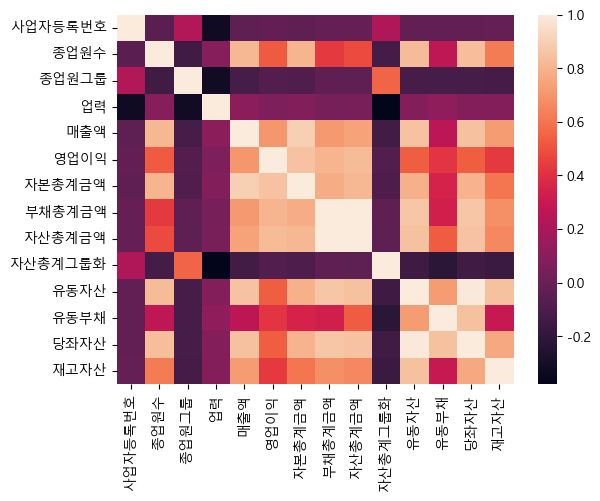

In [144]:
sns.heatmap(F_j.corr())

<AxesSubplot:>

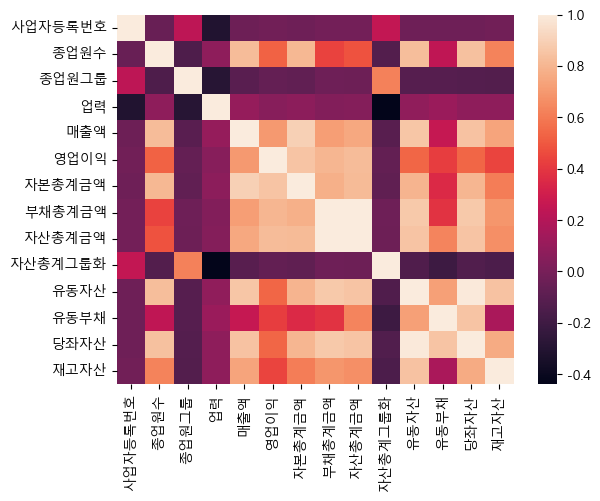

In [145]:
sns.heatmap(F_j_del_null.corr())

#### ✅**유동자산, 자산총계금액 양의 상관성(0.84) 있음, df와 df_del_null 모두 있음**

In [146]:
stats.normaltest(F_j.dropna(subset='유동자산').유동자산)

NormaltestResult(statistic=14138.445270683136, pvalue=0.0)

In [147]:
stats.normaltest(F_j.dropna(subset='유동자산').자산총계금액)

NormaltestResult(statistic=15351.132944251753, pvalue=0.0)

In [148]:
stats.spearmanr(F_j.dropna(subset='유동자산').유동자산, F_j.dropna(subset='유동자산').자산총계금액)

SpearmanrResult(correlation=0.8458088685055639, pvalue=0.0)

In [149]:
stats.normaltest(F_j_del_null.dropna(subset='유동자산').유동자산)

NormaltestResult(statistic=13744.267122581565, pvalue=0.0)

In [150]:
stats.normaltest(F_j_del_null.dropna(subset='유동자산').자산총계금액)

NormaltestResult(statistic=14868.901597858625, pvalue=0.0)

In [151]:
stats.spearmanr(F_j_del_null.dropna(subset='유동자산').유동자산, F_j_del_null.dropna(subset='유동자산').자산총계금액)

SpearmanrResult(correlation=0.8733749505666564, pvalue=0.0)

#### ✅**유동부채, 자산총계금액 양의 상관성(0.68) 있음**

In [152]:
stats.spearmanr(F_j.dropna(subset='유동부채').유동부채, F_j.dropna(subset='유동부채').자산총계금액)

SpearmanrResult(correlation=0.6885580871655095, pvalue=0.0)

In [153]:
stats.spearmanr(F_j_del_null.dropna(subset='유동부채').유동부채, F_j_del_null.dropna(subset='유동부채').자산총계금액)

SpearmanrResult(correlation=0.712595498437815, pvalue=0.0)

In [154]:
stats.kruskal(F_j.dropna(subset='유동자산').loc[F_j.CRI등급.isin(['A1','A2','A3'])].유동자산,
F_j.dropna(subset='유동자산').loc[F_j.CRI등급.isin(['B1','B2','B3'])].유동자산,
F_j.dropna(subset='유동자산').loc[F_j.CRI등급.isin(['C1','C2','C3'])].유동자산,
F_j.dropna(subset='유동자산').loc[F_j.CRI등급.isin(['D'])].유동자산)

KruskalResult(statistic=508.3114105920088, pvalue=7.541131539659394e-110)

In [155]:
stats.kruskal(F_j_del_null.dropna(subset='유동자산').loc[F_j_del_null.CRI등급.isin(['A1','A2','A3'])].유동자산,
F_j_del_null.dropna(subset='유동자산').loc[F_j_del_null.CRI등급.isin(['B1','B2','B3'])].유동자산,
F_j_del_null.dropna(subset='유동자산').loc[F_j_del_null.CRI등급.isin(['C1','C2','C3'])].유동자산,
F_j_del_null.dropna(subset='유동자산').loc[F_j_del_null.CRI등급.isin(['D'])].유동자산)

KruskalResult(statistic=464.41859063666743, pvalue=2.449691472044791e-100)

In [156]:
stats.kruskal(F_j.dropna(subset='유동부채').loc[F_j.CRI등급.isin(['A1','A2','A3'])].유동부채,
F_j.dropna(subset='유동부채').loc[F_j.CRI등급.isin(['B1','B2','B3'])].유동부채,
F_j.dropna(subset='유동부채').loc[F_j.CRI등급.isin(['C1','C2','C3'])].유동부채,
F_j.dropna(subset='유동부채').loc[F_j.CRI등급.isin(['D'])].유동부채)

KruskalResult(statistic=31.92523293211076, pvalue=5.426828514552504e-07)

In [157]:
F_j.isnull().sum()

사업자등록번호       0
종업원수          0
종업원그룹         0
업력            0
성장단계          0
산업대분류         0
기업규모          0
기업형태          0
CRI등급         0
매출액           0
영업이익          0
자본총계금액        0
부채총계금액        0
자산총계금액        0
자산총계그룹화       0
유동자산       3837
유동부채       5503
당좌자산       3942
재고자산       6803
dtype: int64

In [158]:
for i in range(1,11):
    F_j.loc[(F_j.유동자산.isnull()) & (F_j.자산총계그룹화 == i),'유동자산'] = F_j[F_j.자산총계그룹화 == i].유동자산.mean()
    F_j.loc[(F_j.유동부채.isnull()) & (F_j.자산총계그룹화 == i),'유동부채'] = F_j[F_j.자산총계그룹화 == i].유동부채.mean()
    F_j.loc[(F_j.당좌자산.isnull()) & (F_j.자산총계그룹화 == i),'당좌자산'] = F_j[F_j.자산총계그룹화 == i].당좌자산.mean()
    F_j.loc[(F_j.재고자산.isnull()) & (F_j.자산총계그룹화 == i),'재고자산'] = F_j[F_j.자산총계그룹화 == i].재고자산.mean()

In [159]:
F_j.isnull().sum()

사업자등록번호    0
종업원수       0
종업원그룹      0
업력         0
성장단계       0
산업대분류      0
기업규모       0
기업형태       0
CRI등급      0
매출액        0
영업이익       0
자본총계금액     0
부채총계금액     0
자산총계금액     0
자산총계그룹화    0
유동자산       0
유동부채       0
당좌자산       0
재고자산       0
dtype: int64

In [160]:
for i in range(1,11):
    F_j_del_null.loc[(F_j_del_null.유동자산.isnull()) & (F_j_del_null.자산총계그룹화 == i),'유동자산'] = F_j_del_null[F_j_del_null.자산총계그룹화 == i].유동자산.mean()
    F_j_del_null.loc[(F_j_del_null.유동부채.isnull()) & (F_j_del_null.자산총계그룹화 == i),'유동부채'] = F_j_del_null[F_j_del_null.자산총계그룹화 == i].유동부채.mean()
    F_j_del_null.loc[(F_j_del_null.당좌자산.isnull()) & (F_j_del_null.자산총계그룹화 == i),'당좌자산'] = F_j_del_null[F_j_del_null.자산총계그룹화 == i].당좌자산.mean()
    F_j_del_null.loc[(F_j_del_null.재고자산.isnull()) & (F_j_del_null.자산총계그룹화 == i),'재고자산'] = F_j_del_null[F_j_del_null.자산총계그룹화 == i].재고자산.mean()

In [161]:
F_j_del_null.isnull().sum()

사업자등록번호    0
종업원수       0
종업원그룹      0
업력         0
성장단계       0
산업대분류      0
기업규모       0
기업형태       0
CRI등급      0
매출액        0
영업이익       0
자본총계금액     0
부채총계금액     0
자산총계금액     0
자산총계그룹화    0
유동자산       0
유동부채       0
당좌자산       0
재고자산       0
dtype: int64

#### ✅**유동비율, 부채비율, 자기자본비율, 당좌비율, 순운전자본자본비율, 총자산회전율 추가 : 재무적 데이터 결측치 없앤 데이터 셋 완료**

In [162]:
F_j['유동비율'] = round(F_j.유동자산 / F_j.유동부채 * 100,0)
F_j['부채비율'] = round(F_j.부채총계금액 / F_j.자본총계금액 * 100,0)
F_j['자기자본비율'] = round(F_j.자본총계금액 / F_j.자산총계금액 * 100,0)
F_j['매출영업이익률'] = round(F_j.영업이익 / F_j.매출액 * 100,0)
F_j['당좌비율'] = round(F_j.당좌자산 / F_j.유동자산 * 100,0)
F_j['순운전자본자본비율'] = round((F_j.유동자산 - F_j.유동부채) / F_j.자본총계금액 * 100,0)
F_j['총자산회전율'] = round(F_j.매출액 / F_j.자본총계금액 * 100,0)

In [163]:
F_j[(F_j.유동부채 == 0) |(F_j.자본총계금액 == 0) | (F_j.자산총계금액 == 0) | (F_j.유동자산 == 0) | (F_j.매출액 == 0)].index

Int64Index([530, 2149, 2173, 2955, 3799, 3819, 6164, 6271, 7629], dtype='int64')

In [164]:
print(F_j.shape)
F_j.drop(index=[530, 2149, 2173, 2955, 3799, 3819, 6164, 6271, 7629], axis = 0, inplace = True)
F_j.reset_index()

(9837, 26)


,index,사업자등록번호,종업원수,종업원그룹,업력,성장단계,산업대분류,기업규모,기업형태,CRI등급,...,유동부채,당좌자산,재고자산,유동비율,부채비율,자기자본비율,매출영업이익률,당좌비율,순운전자본자본비율,총자산회전율
0,0,8998803795,28.0,2,6.000000,성장보육형,58,중소기업,일반,A3,...,6.931000e+03,2.535306e+06,4.864069e+05,36579.0,3.0,97.0,-81.0,100.0,63.0,25.0
1,1,8998708313,10.0,5,8.000000,자립성장형,41,중소기업,일반,B1,...,2.929791e+05,5.956807e+05,1.509203e+05,229.0,30.0,77.0,2.0,89.0,43.0,775.0
2,2,8998707411,9.0,6,8.000000,정체형,70,중소기업,일반,C3,...,1.898500e+04,5.647800e+04,9.391934e+04,297.0,-182.0,-122.0,-2352.0,100.0,-4.0,-2.0
3,3,8998705196,4.0,9,5.000000,성장보육형,62,중소기업,일반,B1,...,1.046780e+05,9.719800e+04,3.419214e+04,93.0,103.0,49.0,4.0,100.0,-9.0,1842.0
4,4,8998607522,6.0,7,8.000000,정체형,73,중소기업,일반,B2,...,2.134400e+05,5.978000e+04,3.419214e+04,28.0,-323.0,-45.0,2.0,100.0,155.0,-714.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9823,9832,1010709848,11.0,5,17.000000,정체형,59,중소기업,일반,B3,...,1.143005e+05,5.726000e+03,0.000000e+00,5.0,-113.0,-778.0,16.0,100.0,244.0,-183.0
9824,9833,1010607727,1.0,10,11.922535,정체형,75,중소기업,일반,C3,...,5.812600e+04,2.488230e+05,3.419214e+04,428.0,1008.0,9.0,11.0,100.0,1043.0,2026.0
9825,9834,1010600385,2.0,10,19.000000,창업형,26,중소기업,일반,C2,...,3.346430e+06,4.986473e+06,1.563890e+06,179.0,116.0,59.0,3.0,83.0,48.0,303.0
9826,9835,1010204456,5.0,8,23.000000,정체형,46,중소기업,일반,B3,...,1.627800e+04,8.246570e+05,4.024500e+04,5313.0,1019.0,9.0,8.0,95.0,999.0,1159.0


In [165]:
F_j_del_null['유동비율'] = round(F_j_del_null.유동자산 / F_j_del_null.유동부채 * 100,0)
F_j_del_null['부채비율'] = round(F_j_del_null.부채총계금액 / F_j_del_null.자본총계금액 * 100,0)
F_j_del_null['자기자본비율'] = round(F_j_del_null.자본총계금액 / F_j_del_null.자산총계금액 * 100,0)
F_j_del_null['매출영업이익률'] = round(F_j_del_null.영업이익 / F_j_del_null.매출액 * 100,0)
F_j_del_null['당좌비율'] = round(F_j_del_null.당좌자산 / F_j_del_null.유동자산 * 100,0)
F_j_del_null['순운전자본자본비율'] = round((F_j_del_null.유동자산 - F_j_del_null.유동부채) / F_j_del_null.자본총계금액 * 100,0)
F_j_del_null['총자산회전율'] = round(F_j_del_null.매출액 / F_j_del_null.자본총계금액 * 100,0)

In [166]:
F_j_del_null[(F_j_del_null.유동부채 == 0) |(F_j_del_null.자본총계금액 == 0) | (F_j_del_null.자산총계금액 == 0) | (F_j_del_null.유동자산 == 0) |  (F_j_del_null.매출액 == 0)].index

Int64Index([424, 1807, 1829, 2536, 3123, 3139, 5070, 5173, 6279], dtype='int64')

In [167]:
print(F_j_del_null.shape)
F_j_del_null.drop(index=[424, 1807, 1829, 2536, 3123, 3139, 5070, 5173, 6279], axis = 0, inplace = True)
F_j_del_null.reset_index()

(8186, 26)


,index,사업자등록번호,종업원수,종업원그룹,업력,성장단계,산업대분류,기업규모,기업형태,CRI등급,...,유동부채,당좌자산,재고자산,유동비율,부채비율,자기자본비율,매출영업이익률,당좌비율,순운전자본자본비율,총자산회전율
0,0,8998803795,28.0,2,6.000000,성장보육형,58,중소기업,일반,A3,...,6931.000000,2.535306e+06,633716.711816,36579.0,3.0,97.0,-81.0,100.0,63.0,25.0
1,1,8998708313,10.0,5,8.000000,자립성장형,41,중소기업,일반,B1,...,337333.927948,6.465035e+05,175083.552347,218.0,30.0,77.0,2.0,88.0,45.0,775.0
2,2,8998707411,9.0,6,8.000000,정체형,70,중소기업,일반,C3,...,18985.000000,5.647800e+04,86091.152941,297.0,-182.0,-122.0,-2352.0,100.0,-4.0,-2.0
3,3,8998705196,4.0,9,5.000000,성장보육형,62,중소기업,일반,B1,...,104678.000000,9.719800e+04,33775.029240,93.0,103.0,49.0,4.0,100.0,-9.0,1842.0
4,4,8998607522,6.0,7,8.000000,정체형,73,중소기업,일반,B2,...,213440.000000,5.978000e+04,33775.029240,28.0,-323.0,-45.0,2.0,100.0,155.0,-714.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8172,8181,1011106242,10.0,5,11.000000,정체형,73,중소기업,폐업,D,...,9083.000000,6.346300e+04,33775.029240,699.0,42.0,70.0,13.0,100.0,29.0,294.0
8173,8182,1010709848,11.0,5,17.000000,정체형,59,중소기업,일반,B3,...,88359.577869,5.726000e+03,0.000000,6.0,-113.0,-778.0,16.0,100.0,185.0,-183.0
8174,8183,1010607727,1.0,10,11.922535,정체형,75,중소기업,일반,C3,...,58126.000000,2.488230e+05,33775.029240,428.0,1008.0,9.0,11.0,100.0,1043.0,2026.0
8175,8184,1010204456,5.0,8,23.000000,정체형,46,중소기업,일반,B3,...,16278.000000,8.246570e+05,40245.000000,5313.0,1019.0,9.0,8.0,95.0,999.0,1159.0


In [168]:
F_j_del_null

,사업자등록번호,종업원수,종업원그룹,업력,성장단계,산업대분류,기업규모,기업형태,CRI등급,매출액,...,유동부채,당좌자산,재고자산,유동비율,부채비율,자기자본비율,매출영업이익률,당좌비율,순운전자본자본비율,총자산회전율
0,8998803795,28.0,2,6.000000,성장보육형,58,중소기업,일반,A3,1011463.0,...,6931.000000,2.535306e+06,633716.711816,36579.0,3.0,97.0,-81.0,100.0,63.0,25.0
1,8998708313,10.0,5,8.000000,자립성장형,41,중소기업,일반,B1,6813497.0,...,337333.927948,6.465035e+05,175083.552347,218.0,30.0,77.0,2.0,88.0,45.0,775.0
2,8998707411,9.0,6,8.000000,정체형,70,중소기업,일반,C3,15698.0,...,18985.000000,5.647800e+04,86091.152941,297.0,-182.0,-122.0,-2352.0,100.0,-4.0,-2.0
3,8998705196,4.0,9,5.000000,성장보육형,62,중소기업,일반,B1,1520118.0,...,104678.000000,9.719800e+04,33775.029240,93.0,103.0,49.0,4.0,100.0,-9.0,1842.0
4,8998607522,6.0,7,8.000000,정체형,73,중소기업,일반,B2,705737.0,...,213440.000000,5.978000e+04,33775.029240,28.0,-323.0,-45.0,2.0,100.0,155.0,-714.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,1011106242,10.0,5,11.000000,정체형,73,중소기업,폐업,D,542209.0,...,9083.000000,6.346300e+04,33775.029240,699.0,42.0,70.0,13.0,100.0,29.0,294.0
8182,1010709848,11.0,5,17.000000,정체형,59,중소기업,일반,B3,81492.0,...,88359.577869,5.726000e+03,0.000000,6.0,-113.0,-778.0,16.0,100.0,185.0,-183.0
8183,1010607727,1.0,10,11.922535,정체형,75,중소기업,일반,C3,370418.0,...,58126.000000,2.488230e+05,33775.029240,428.0,1008.0,9.0,11.0,100.0,1043.0,2026.0
8184,1010204456,5.0,8,23.000000,정체형,46,중소기업,일반,B3,984750.0,...,16278.000000,8.246570e+05,40245.000000,5313.0,1019.0,9.0,8.0,95.0,999.0,1159.0


---
> # **재무머신러닝 만들기**
---

In [169]:
from sklearn.model_selection import train_test_split # 학습 검증 데이터 분할
from imblearn.pipeline import make_pipeline # 학습 + 특성공학 파이프라인 구축 
from sklearn.compose import make_column_transformer # 각 항목의 타입별로 파이프 분할

from sklearn.impute import SimpleImputer # 결측치 처리
from sklearn.preprocessing import MinMaxScaler # 숫자 스케일링
from sklearn.preprocessing import OneHotEncoder # 문자 데이터 인쾽
from imblearn.over_sampling import SMOTE # 불균형 데이터 처리

from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트 (Bagging)
from sklearn.ensemble import GradientBoostingClassifier # 그레디언트 Boosting
from sklearn.tree import DecisionTreeClassifier # 의사결정모형
from sklearn.model_selection import GridSearchCV #교차검증 + 하이퍼 파라미터 튜닝
from sklearn.metrics import classification_report # 평가


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

In [170]:
jamoo = F_j
jamoo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9828 entries, 0 to 9836
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사업자등록번호    9828 non-null   int64  
 1   종업원수       9828 non-null   float64
 2   종업원그룹      9828 non-null   int64  
 3   업력         9828 non-null   float64
 4   성장단계       9828 non-null   object 
 5   산업대분류      9828 non-null   object 
 6   기업규모       9828 non-null   object 
 7   기업형태       9828 non-null   object 
 8   CRI등급      9828 non-null   object 
 9   매출액        9828 non-null   float64
 10  영업이익       9828 non-null   float64
 11  자본총계금액     9828 non-null   float64
 12  부채총계금액     9828 non-null   float64
 13  자산총계금액     9828 non-null   float64
 14  자산총계그룹화    9828 non-null   int64  
 15  유동자산       9828 non-null   float64
 16  유동부채       9828 non-null   float64
 17  당좌자산       9828 non-null   float64
 18  재고자산       9828 non-null   float64
 19  유동비율       9828 non-null   float64
 20  부채비율    

In [171]:
jamoo.columns

Index(['사업자등록번호', '종업원수', '종업원그룹', '업력', '성장단계', '산업대분류', '기업규모', '기업형태',
       'CRI등급', '매출액', '영업이익', '자본총계금액', '부채총계금액', '자산총계금액', '자산총계그룹화', '유동자산',
       '유동부채', '당좌자산', '재고자산', '유동비율', '부채비율', '자기자본비율', '매출영업이익률', '당좌비율',
       '순운전자본자본비율', '총자산회전율'],
      dtype='object')

In [172]:
jamoo.loc[jamoo.CRI등급 == 'A1','target'] = 0
jamoo.loc[jamoo.CRI등급 == 'A2','target'] = 1
jamoo.loc[jamoo.CRI등급 == 'A3','target'] = 2
jamoo.loc[jamoo.CRI등급 == 'B1','target'] = 3
jamoo.loc[jamoo.CRI등급 == 'B2','target'] = 4
jamoo.loc[jamoo.CRI등급 == 'B3','target'] = 5
jamoo.loc[jamoo.CRI등급 == 'C1','target'] = 6
jamoo.loc[jamoo.CRI등급 == 'C2','target'] = 7
jamoo.loc[jamoo.CRI등급 == 'C3','target'] = 8
jamoo.loc[jamoo.CRI등급 == 'D','target'] = 9

In [173]:
# '종업원수', '종업원그룹', '성장단계', '산업대분류', '기업규모', '기업형태',
X = jamoo[['사업자등록번호',
         '유동비율', '부채비율', '자기자본비율', '매출영업이익률', '당좌비율', '순운전자본자본비율', '총자산회전율']]
Y = jamoo['target']

<AxesSubplot:>

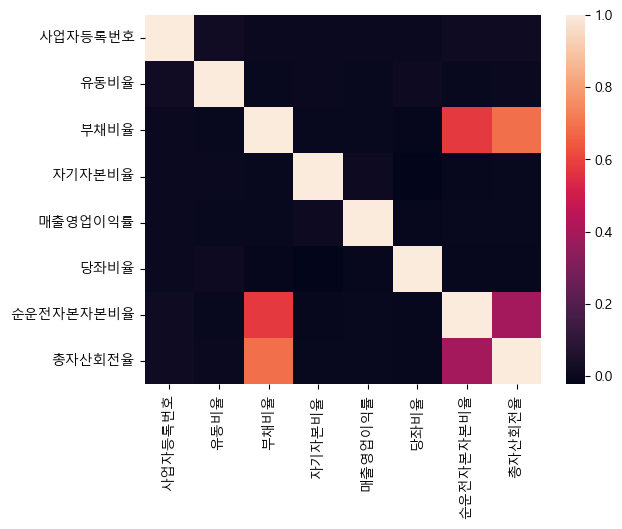

In [174]:
sns.heatmap(X.corr())

- ### **F_j_del_null**

In [175]:
jamoo_del = F_j_del_null

In [176]:
jamoo_del.loc[jamoo_del.CRI등급 == 'A1','target'] = 0
jamoo_del.loc[jamoo_del.CRI등급 == 'A2','target'] = 1
jamoo_del.loc[jamoo_del.CRI등급 == 'A3','target'] = 2
jamoo_del.loc[jamoo_del.CRI등급 == 'B1','target'] = 3
jamoo_del.loc[jamoo_del.CRI등급 == 'B2','target'] = 4
jamoo_del.loc[jamoo_del.CRI등급 == 'B3','target'] = 5
jamoo_del.loc[jamoo_del.CRI등급 == 'C1','target'] = 6
jamoo_del.loc[jamoo_del.CRI등급 == 'C2','target'] = 7
jamoo_del.loc[jamoo_del.CRI등급 == 'C3','target'] = 8
jamoo_del.loc[jamoo_del.CRI등급 == 'D','target'] = 9

In [177]:
# '종업원수', '종업원그룹', '성장단계', '산업대분류', '기업규모', '기업형태',
X_d = jamoo_del[['사업자등록번호', 
         '유동비율', '부채비율', '자기자본비율', '매출영업이익률', '당좌비율', '순운전자본자본비율', '총자산회전율']]
Y_d = jamoo_del['target']

In [178]:
jamoo[['사업자등록번호', '종업원수', '종업원그룹', '성장단계', '산업대분류', '기업규모', '기업형태', '자산총계그룹화',
         '유동비율', '부채비율', '자기자본비율', '매출영업이익률', '당좌비율', '순운전자본자본비율', '총자산회전율','target']].to_csv("재무_자산총계null.csv",encoding='CP949')
jamoo_del[['사업자등록번호', '종업원수', '종업원그룹', '성장단계', '산업대분류', '기업규모', '기업형태', '자산총계그룹화',
         '유동비율', '부채비율', '자기자본비율', '매출영업이익률', '당좌비율', '순운전자본자본비율', '총자산회전율','target']].to_csv("재무_자산총계결측치처리함.csv",encoding='CP949')

In [179]:
X_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8177 entries, 0 to 8185
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사업자등록번호    8177 non-null   int64  
 1   유동비율       8177 non-null   float64
 2   부채비율       8177 non-null   float64
 3   자기자본비율     8177 non-null   float64
 4   매출영업이익률    8177 non-null   float64
 5   당좌비율       8177 non-null   float64
 6   순운전자본자본비율  8177 non-null   float64
 7   총자산회전율     8177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 574.9 KB


- ### **데이터 전처리**

In [180]:
def pipe_model_func(model):
    numeric_pipe = make_pipeline( SimpleImputer(strategy='mean'),MinMaxScaler())
    #category_pipe = make_pipeline( SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))
    numeric_list = X.describe().columns.tolist()
    #category_list = X.describe(include='object').columns.tolist()
    preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list))
 #                                            ,(category_pipe, category_list))
    model_pipe=make_pipeline(preprocessing_pipe,SMOTE(),model)
    return model_pipe
numeric_list = X.describe().columns.tolist()

- ### **데이터 분할**

In [181]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1234)

In [182]:
X_d_train, X_d_test, Y_d_train, Y_d_test = train_test_split(X_d,Y_d, random_state=1234)

- ### **평가성능지표**

In [183]:
def evaluation_func(best_model):
    Y_train_pred = best_model.predict(X_train)
    Y_test_pred = best_model.predict(X_test)
    print('학습능력평가')
    print(classification_report(Y_train,Y_train_pred))
    print('일반화능력평가')
    print(classification_report(Y_test, Y_test_pred))

- ### **의사결정트리**

In [184]:
model_decision = pipe_model_func(DecisionTreeClassifier())
hyperparameter_dict = {'decisiontreeclassifier__max_depth':range(5,15)}
grid_model = GridSearchCV(model_decision,cv=5,param_grid = hyperparameter_dict,
                         scoring='accuracy',n_jobs=-1)
grid_model.fit(X_train,Y_train)
#grid_model.get_params().keys()
best_tree = grid_model.best_estimator_
Y_train_pred = best_tree.predict(X_train)
Y_test_pred = best_tree.predict(X_test)
print('학습능력평가')
print(classification_report(Y_train,Y_train_pred))
print('일반화능력평가')
print(classification_report(Y_test, Y_test_pred))

학습능력평가
              precision    recall  f1-score   support

         0.0       0.12      0.54      0.19       153
         1.0       0.26      0.45      0.33       350
         2.0       0.31      0.23      0.26       757
         3.0       0.34      0.22      0.26       916
         4.0       0.35      0.22      0.27      1315
         5.0       0.33      0.35      0.34      1183
         6.0       0.26      0.32      0.29       639
         7.0       0.50      0.43      0.46      1172
         8.0       0.44      0.40      0.42       791
         9.0       0.20      0.66      0.31        95

    accuracy                           0.32      7371
   macro avg       0.31      0.38      0.31      7371
weighted avg       0.36      0.32      0.33      7371

일반화능력평가
              precision    recall  f1-score   support

         0.0       0.04      0.20      0.07        50
         1.0       0.14      0.25      0.18       126
         2.0       0.14      0.11      0.12       229
         

In [185]:
model_decision = pipe_model_func(DecisionTreeClassifier())
hyperparameter_dict = {'decisiontreeclassifier__max_depth':range(5,15)}
grid_model = GridSearchCV(model_decision,cv=5,param_grid = hyperparameter_dict,
                         scoring='accuracy',n_jobs=-1)
grid_model.fit(X_d_train,Y_d_train)
#grid_model.get_params().keys()
best_tree = grid_model.best_estimator_
Y_train_pred = best_tree.predict(X_d_train)
Y_test_pred = best_tree.predict(X_d_test)
print('학습능력평가')
print(classification_report(Y_d_train,Y_train_pred))
print('일반화능력평가')
print(classification_report(Y_d_test, Y_test_pred))

학습능력평가
              precision    recall  f1-score   support

         0.0       0.40      0.76      0.53       152
         1.0       0.39      0.64      0.49       343
         2.0       0.40      0.57      0.47       646
         3.0       0.48      0.44      0.46       791
         4.0       0.59      0.39      0.47      1174
         5.0       0.58      0.43      0.50      1119
         6.0       0.48      0.57      0.52       530
         7.0       0.51      0.55      0.53       713
         8.0       0.70      0.58      0.63       598
         9.0       0.40      0.83      0.54        66

    accuracy                           0.50      6132
   macro avg       0.49      0.58      0.51      6132
weighted avg       0.53      0.50      0.50      6132

일반화능력평가
              precision    recall  f1-score   support

         0.0       0.05      0.12      0.07        41
         1.0       0.15      0.30      0.20        91
         2.0       0.17      0.23      0.20       226
         

- ### **랜덤포레스트**

In [186]:
model_random = pipe_model_func(RandomForestClassifier())
#hyperparameter_dict = {'randomforestclassifier__max_depth' : range(10,20),
 #                      'randomforestclassifier__max_features': [2,3,4,5],
 #                      'randomforestclassifier__min_samples_split': [2,8,16]}
#grid_model = GridSearchCV(model_random, param_grid = hyperparameter_dict,cv=5,
  #                        scoring='accuracy',n_jobs=-1)
best_randomforest = model_random.fit(X_train,Y_train)
#best_randomforest = grid_model.best_estimator_
Y_train_pred = best_randomforest.predict(X_train)
Y_test_pred = best_randomforest.predict(X_test)
print('학습능력평가')
print(classification_report(Y_train,Y_train_pred))
print('일반화능력평가')
print(classification_report(Y_test, Y_test_pred))

학습능력평가
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       153
         1.0       0.98      1.00      0.99       350
         2.0       0.99      0.99      0.99       757
         3.0       0.99      0.99      0.99       916
         4.0       0.99      0.99      0.99      1315
         5.0       1.00      0.99      1.00      1183
         6.0       1.00      1.00      1.00       639
         7.0       1.00      1.00      1.00      1172
         8.0       1.00      1.00      1.00       791
         9.0       1.00      1.00      1.00        95

    accuracy                           0.99      7371
   macro avg       0.99      1.00      0.99      7371
weighted avg       0.99      0.99      0.99      7371

일반화능력평가
              precision    recall  f1-score   support

         0.0       0.08      0.18      0.11        50
         1.0       0.14      0.25      0.18       126
         2.0       0.13      0.14      0.14       229
         

In [187]:
model_random = pipe_model_func(RandomForestClassifier())
#best_randomforest = model_random.fit(X_d_train,Y_d_train) 
hyperparameter_dict = {'randomforestclassifier__max_depth' : range(10,20),
                      'randomforestclassifier__max_features': [2,3,4,5],
                     'randomforestclassifier__min_samples_split': [2,8,16]}
grid_model = GridSearchCV(model_random, param_grid = hyperparameter_dict,cv=5,
                   scoring='accuracy',n_jobs=-1)
grid_model.fit(X_train,Y_train)
best_randomforest = grid_model.best_estimator_
Y_train_pred = best_randomforest.predict(X_train)
Y_test_pred = best_randomforest.predict(X_test)
print('학습능력평가')
print(classification_report(Y_train,Y_train_pred))
print('일반화능력평가')
print(classification_report(Y_test, Y_test_pred))

학습능력평가
              precision    recall  f1-score   support

         0.0       0.51      0.90      0.65       153
         1.0       0.63      0.86      0.73       350
         2.0       0.77      0.78      0.78       757
         3.0       0.79      0.76      0.78       916
         4.0       0.83      0.75      0.79      1315
         5.0       0.82      0.81      0.81      1183
         6.0       0.74      0.76      0.75       639
         7.0       0.80      0.73      0.76      1172
         8.0       0.76      0.74      0.75       791
         9.0       0.60      0.86      0.71        95

    accuracy                           0.77      7371
   macro avg       0.73      0.79      0.75      7371
weighted avg       0.78      0.77      0.77      7371

일반화능력평가
              precision    recall  f1-score   support

         0.0       0.08      0.22      0.12        50
         1.0       0.15      0.27      0.19       126
         2.0       0.18      0.20      0.19       229
         

In [188]:
model_random = pipe_model_func(RandomForestClassifier())
#best_randomforest = model_random.fit(X_d_train,Y_d_train) 
hyperparameter_dict = {'randomforestclassifier__max_depth' : range(10,20),
                      'randomforestclassifier__max_features': [2,3,4,5],
                     'randomforestclassifier__min_samples_split': [2,8,16]}
grid_model = GridSearchCV(model_random, param_grid = hyperparameter_dict,cv=5,
                   scoring='accuracy',n_jobs=-1)
grid_model.fit(X_d_train,Y_d_train)
best_randomforest = grid_model.best_estimator_
Y_train_pred = best_randomforest.predict(X_d_train)
Y_test_pred = best_randomforest.predict(X_d_test)
print('학습능력평가')
print(classification_report(Y_d_train,Y_train_pred))
print('일반화능력평가')
print(classification_report(Y_d_test, Y_test_pred))

학습능력평가
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       152
         1.0       0.93      0.99      0.96       343
         2.0       0.99      0.98      0.99       646
         3.0       0.99      0.99      0.99       791
         4.0       0.99      0.98      0.99      1174
         5.0       0.99      0.99      0.99      1119
         6.0       1.00      0.99      1.00       530
         7.0       0.99      0.98      0.99       713
         8.0       0.99      0.99      0.99       598
         9.0       1.00      1.00      1.00        66

    accuracy                           0.99      6132
   macro avg       0.98      0.99      0.99      6132
weighted avg       0.99      0.99      0.99      6132

일반화능력평가
              precision    recall  f1-score   support

         0.0       0.04      0.10      0.06        41
         1.0       0.15      0.32      0.20        91
         2.0       0.18      0.19      0.19       226
         

In [189]:
print(best_randomforest)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['사업자등록번호', '유동비율', '부채비율',
                                                   '자기자본비율', '매출영업이익률', '당좌비율',
                                                   '순운전자본자본비율', '총자산회전율'])])),
                ('smote', SMOTE()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=16, max_features=3))])


- ### **XG부스트**

In [190]:
#!pip install xgboost

In [191]:
from xgboost import XGBClassifier
model_xg = pipe_model_func(XGBClassifier())
best_XG = model_xg.fit(X_train,Y_train)
evaluation_func(best_XG)

학습능력평가
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       153
         1.0       0.78      0.89      0.83       350
         2.0       0.87      0.84      0.85       757
         3.0       0.86      0.82      0.84       916
         4.0       0.83      0.86      0.85      1315
         5.0       0.88      0.86      0.87      1183
         6.0       0.90      0.79      0.84       639
         7.0       0.82      0.89      0.86      1172
         8.0       0.89      0.83      0.86       791
         9.0       0.80      0.95      0.87        95

    accuracy                           0.85      7371
   macro avg       0.85      0.87      0.85      7371
weighted avg       0.85      0.85      0.85      7371

일반화능력평가
              precision    recall  f1-score   support

         0.0       0.11      0.16      0.13        50
         1.0       0.20      0.23      0.21       126
         2.0       0.18      0.19      0.19       229
         

In [192]:
print(best_XG)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['사업자등록번호', '유동비율', '부채비율',
                                                   '자기자본비율', '매출영업이익률', '당좌비율',
                                                   '순운전자본자본비율', '총자산회전율'])])),
                ('smote', SMOTE()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylev...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=N

In [193]:
from xgboost import XGBClassifier
model_xg = pipe_model_func(XGBClassifier())
best_XG = model_xg.fit(X_d_train,Y_d_train)
evaluation_func(best_XG)

학습능력평가
              precision    recall  f1-score   support

         0.0       0.39      0.68      0.49       153
         1.0       0.57      0.68      0.62       350
         2.0       0.58      0.62      0.60       757
         3.0       0.56      0.53      0.55       916
         4.0       0.57      0.63      0.60      1315
         5.0       0.50      0.64      0.56      1183
         6.0       0.60      0.59      0.59       639
         7.0       0.72      0.41      0.52      1172
         8.0       0.68      0.57      0.62       791
         9.0       0.55      0.55      0.55        95

    accuracy                           0.57      7371
   macro avg       0.57      0.59      0.57      7371
weighted avg       0.59      0.57      0.57      7371

일반화능력평가
              precision    recall  f1-score   support

         0.0       0.41      0.74      0.52        50
         1.0       0.61      0.66      0.63       126
         2.0       0.53      0.63      0.58       229
         

In [194]:
from xgboost import XGBClassifier
model_xg = pipe_model_func(XGBClassifier())
hyperparameter_dict = {'xgbclassifier__n_estimators':[100],
                     'xgbclassifier__learning_rate':[0.01],
                       'xgbclassifier__max_depth':range(1,4),
                        'xgbclassifier__gamma':[0,1,2,3]}

grid_model = GridSearchCV(model_xg, param_grid = hyperparameter_dict,cv=3,
                          scoring='accuracy',n_jobs=-1)
grid_model.fit(X_train,Y_train)
best_XG = grid_model.best_estimator_
evaluation_func(best_XG)
#grid_model.get_params().keys()

학습능력평가
              precision    recall  f1-score   support

         0.0       0.09      0.48      0.15       153
         1.0       0.12      0.41      0.19       350
         2.0       0.20      0.07      0.10       757
         3.0       0.23      0.08      0.12       916
         4.0       0.30      0.12      0.17      1315
         5.0       0.32      0.13      0.18      1183
         6.0       0.18      0.28      0.22       639
         7.0       0.43      0.37      0.39      1172
         8.0       0.31      0.37      0.34       791
         9.0       0.05      0.43      0.08        95

    accuracy                           0.22      7371
   macro avg       0.22      0.27      0.19      7371
weighted avg       0.28      0.22      0.22      7371

일반화능력평가
              precision    recall  f1-score   support

         0.0       0.05      0.26      0.08        50
         1.0       0.12      0.38      0.18       126
         2.0       0.12      0.04      0.06       229
         

In [195]:
from xgboost import XGBClassifier
model_xg = pipe_model_func(XGBClassifier())
hyperparameter_dict = {'xgbclassifier__n_estimators':[100],
                     'xgbclassifier__learning_rate':[0.01],
                       'xgbclassifier__max_depth':range(5,10),
                        'xgbclassifier__gamma':[0,1,2,3]}

grid_model = GridSearchCV(model_xg, param_grid = hyperparameter_dict,cv=3,
                          scoring='accuracy',n_jobs=-1)
grid_model.fit(X_d_train,Y_d_train)
best_XG = grid_model.best_estimator_
evaluation_func(best_XG)
#grid_model.get_params().keys()

학습능력평가
              precision    recall  f1-score   support

         0.0       0.23      0.60      0.33       153
         1.0       0.33      0.56      0.41       350
         2.0       0.40      0.32      0.35       757
         3.0       0.30      0.31      0.30       916
         4.0       0.37      0.40      0.39      1315
         5.0       0.41      0.36      0.39      1183
         6.0       0.40      0.43      0.41       639
         7.0       0.46      0.25      0.33      1172
         8.0       0.59      0.43      0.49       791
         9.0       0.12      0.52      0.19        95

    accuracy                           0.37      7371
   macro avg       0.36      0.42      0.36      7371
weighted avg       0.40      0.37      0.38      7371

일반화능력평가
              precision    recall  f1-score   support

         0.0       0.21      0.62      0.31        50
         1.0       0.31      0.54      0.40       126
         2.0       0.39      0.33      0.36       229
         

- ### **GradientBoostingClassifier()**

In [196]:
model_gb = pipe_model_func(GradientBoostingClassifier())
GB = model_gb.fit(X_train,Y_train)
evaluation_func(GB)

학습능력평가
              precision    recall  f1-score   support

         0.0       0.16      0.61      0.25       153
         1.0       0.26      0.50      0.34       350
         2.0       0.33      0.27      0.30       757
         3.0       0.44      0.24      0.31       916
         4.0       0.42      0.35      0.38      1315
         5.0       0.43      0.40      0.41      1183
         6.0       0.39      0.38      0.39       639
         7.0       0.57      0.48      0.52      1172
         8.0       0.45      0.47      0.46       791
         9.0       0.18      0.64      0.28        95

    accuracy                           0.39      7371
   macro avg       0.36      0.43      0.36      7371
weighted avg       0.42      0.39      0.39      7371

일반화능력평가
              precision    recall  f1-score   support

         0.0       0.06      0.24      0.09        50
         1.0       0.15      0.28      0.19       126
         2.0       0.15      0.13      0.14       229
         

In [197]:
model_gb = pipe_model_func(GradientBoostingClassifier())
GB = model_gb.fit(X_d_train,Y_d_train)
evaluation_func(GB)

학습능력평가
              precision    recall  f1-score   support

         0.0       0.13      0.46      0.20       153
         1.0       0.19      0.50      0.27       350
         2.0       0.29      0.29      0.29       757
         3.0       0.20      0.25      0.22       916
         4.0       0.33      0.27      0.30      1315
         5.0       0.38      0.31      0.34      1183
         6.0       0.31      0.25      0.27       639
         7.0       0.42      0.19      0.26      1172
         8.0       0.49      0.32      0.38       791
         9.0       0.11      0.39      0.17        95

    accuracy                           0.28      7371
   macro avg       0.28      0.32      0.27      7371
weighted avg       0.33      0.28      0.29      7371

일반화능력평가
              precision    recall  f1-score   support

         0.0       0.12      0.42      0.18        50
         1.0       0.19      0.44      0.27       126
         2.0       0.25      0.29      0.27       229
         

---
> # **재무 + 비재무 평가 지표 머신러닝**
---

In [198]:
F_j_del_null

,사업자등록번호,종업원수,종업원그룹,업력,성장단계,산업대분류,기업규모,기업형태,CRI등급,매출액,...,당좌자산,재고자산,유동비율,부채비율,자기자본비율,매출영업이익률,당좌비율,순운전자본자본비율,총자산회전율,target
0,8998803795,28.0,2,6.000000,성장보육형,58,중소기업,일반,A3,1011463.0,...,2.535306e+06,633716.711816,36579.0,3.0,97.0,-81.0,100.0,63.0,25.0,2.0
1,8998708313,10.0,5,8.000000,자립성장형,41,중소기업,일반,B1,6813497.0,...,6.465035e+05,175083.552347,218.0,30.0,77.0,2.0,88.0,45.0,775.0,3.0
2,8998707411,9.0,6,8.000000,정체형,70,중소기업,일반,C3,15698.0,...,5.647800e+04,86091.152941,297.0,-182.0,-122.0,-2352.0,100.0,-4.0,-2.0,8.0
3,8998705196,4.0,9,5.000000,성장보육형,62,중소기업,일반,B1,1520118.0,...,9.719800e+04,33775.029240,93.0,103.0,49.0,4.0,100.0,-9.0,1842.0,3.0
4,8998607522,6.0,7,8.000000,정체형,73,중소기업,일반,B2,705737.0,...,5.978000e+04,33775.029240,28.0,-323.0,-45.0,2.0,100.0,155.0,-714.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,1011106242,10.0,5,11.000000,정체형,73,중소기업,폐업,D,542209.0,...,6.346300e+04,33775.029240,699.0,42.0,70.0,13.0,100.0,29.0,294.0,9.0
8182,1010709848,11.0,5,17.000000,정체형,59,중소기업,일반,B3,81492.0,...,5.726000e+03,0.000000,6.0,-113.0,-778.0,16.0,100.0,185.0,-183.0,5.0
8183,1010607727,1.0,10,11.922535,정체형,75,중소기업,일반,C3,370418.0,...,2.488230e+05,33775.029240,428.0,1008.0,9.0,11.0,100.0,1043.0,2026.0,8.0
8184,1010204456,5.0,8,23.000000,정체형,46,중소기업,일반,B3,984750.0,...,8.246570e+05,40245.000000,5313.0,1019.0,9.0,8.0,95.0,999.0,1159.0,5.0


In [199]:
bi = pd.read_csv("비재무요소.csv",encoding='CP949',index_col=0)
bi

,사업자등록번호,종업원수,종업원그룹,성장단계,산업대분류,기업규모,기업형태,CRI등급,자산총계그룹화,실용신안,상표권,디자인권,특허정보,경영진점수,기업문화점수,복지및급여점수,승진기회점수,업무생명균형점수,종합점수,target
0,1050508965,93.868687,1,창업형,96,중소기업,폐업,D,1,1,7,82,7,47.407407,52.486772,65.925926,80.740741,79.365079,50.264550,9.0
1,1010204456,5.000000,8,정체형,46,중소기업,일반,B3,8,0,0,0,0,44.822270,50.686869,46.259019,48.822300,54.745821,50.537819,5.0
2,1048107174,12.000000,5,자립성장형,50,중소기업,일반,B2,3,0,0,0,0,38.888889,53.333333,48.888889,44.444444,37.777778,53.333333,4.0
3,1018102731,18.000000,3,자립성장형,73,중소기업,일반,C2,6,0,3,0,0,40.000000,66.666667,40.000000,64.444444,37.777778,51.111111,7.0
4,1018606595,3.000000,9,정체형,68,중소기업,외감,C3,1,0,0,0,0,47.361111,52.123016,47.678571,51.071429,52.301587,52.361111,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,2148708573,150.000000,1,창업형,58,중소기업,외감,A3,1,0,8,0,1,51.111111,62.222222,44.444444,64.444444,62.222222,62.222222,2.0
9833,4208704866,7.000000,7,창업형,41,중소기업,일반,A3,5,0,3,0,0,48.432668,51.905615,50.209251,53.091398,51.206691,53.945639,2.0
9834,4618107952,3.000000,9,창업형,41,중소기업,일반,C2,4,0,0,0,0,48.432668,51.905615,50.209251,53.091398,51.206691,53.945639,7.0
9835,2208107776,21.000000,3,창업형,63,중소기업,외감,C2,2,0,9,0,2,51.517857,56.812713,52.792517,57.021046,62.817744,57.184524,7.0


In [200]:
F_j_del_null.columns

Index(['사업자등록번호', '종업원수', '종업원그룹', '업력', '성장단계', '산업대분류', '기업규모', '기업형태',
       'CRI등급', '매출액', '영업이익', '자본총계금액', '부채총계금액', '자산총계금액', '자산총계그룹화', '유동자산',
       '유동부채', '당좌자산', '재고자산', '유동비율', '부채비율', '자기자본비율', '매출영업이익률', '당좌비율',
       '순운전자본자본비율', '총자산회전율', 'target'],
      dtype='object')

In [201]:
bi.columns

Index(['사업자등록번호', '종업원수', '종업원그룹', '성장단계', '산업대분류', '기업규모', '기업형태', 'CRI등급',
       '자산총계그룹화', '실용신안', '상표권', '디자인권', '특허정보', '경영진점수', '기업문화점수', '복지및급여점수',
       '승진기회점수', '업무생명균형점수', '종합점수', 'target'],
      dtype='object')

In [202]:
jm_bjm = pd.merge(bi,F_j_del_null[['사업자등록번호','유동비율', '부채비율', '자기자본비율', '매출영업이익률', '당좌비율',
       '순운전자본자본비율', '총자산회전율']],on='사업자등록번호',how='left')
jm_bjm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9837 entries, 0 to 9836
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사업자등록번호    9837 non-null   int64  
 1   종업원수       9837 non-null   float64
 2   종업원그룹      9837 non-null   int64  
 3   성장단계       9837 non-null   object 
 4   산업대분류      9837 non-null   int64  
 5   기업규모       9837 non-null   object 
 6   기업형태       9837 non-null   object 
 7   CRI등급      9837 non-null   object 
 8   자산총계그룹화    9837 non-null   int64  
 9   실용신안       9837 non-null   int64  
 10  상표권        9837 non-null   int64  
 11  디자인권       9837 non-null   int64  
 12  특허정보       9837 non-null   int64  
 13  경영진점수      9823 non-null   float64
 14  기업문화점수     9823 non-null   float64
 15  복지및급여점수    9823 non-null   float64
 16  승진기회점수     9823 non-null   float64
 17  업무생명균형점수   9823 non-null   float64
 18  종합점수       9823 non-null   float64
 19  target     9837 non-null   float64
 20  유동비율    

In [203]:
jm_bjm.columns

Index(['사업자등록번호', '종업원수', '종업원그룹', '성장단계', '산업대분류', '기업규모', '기업형태', 'CRI등급',
       '자산총계그룹화', '실용신안', '상표권', '디자인권', '특허정보', '경영진점수', '기업문화점수', '복지및급여점수',
       '승진기회점수', '업무생명균형점수', '종합점수', 'target', '유동비율', '부채비율', '자기자본비율',
       '매출영업이익률', '당좌비율', '순운전자본자본비율', '총자산회전율'],
      dtype='object')

In [204]:
jm_bjm.loc[jm_bjm.CRI등급 == 'A1','target'] = 0
jm_bjm.loc[jm_bjm.CRI등급 == 'A2','target'] = 1
jm_bjm.loc[jm_bjm.CRI등급 == 'A3','target'] = 2
jm_bjm.loc[jm_bjm.CRI등급 == 'B1','target'] = 3
jm_bjm.loc[jm_bjm.CRI등급 == 'B2','target'] = 4
jm_bjm.loc[jm_bjm.CRI등급 == 'B3','target'] = 5
jm_bjm.loc[jm_bjm.CRI등급 == 'C1','target'] = 6
jm_bjm.loc[jm_bjm.CRI등급 == 'C2','target'] = 7
jm_bjm.loc[jm_bjm.CRI등급 == 'C3','target'] = 8
jm_bjm.loc[jm_bjm.CRI등급 == 'D','target'] = 9
X_all = jm_bjm[['사업자등록번호', '종업원수', '종업원그룹', '성장단계', '산업대분류', '기업규모', '자산총계그룹화', 
                '실용신안', '상표권', '디자인권', '특허정보', '경영진점수', '기업문화점수', '복지및급여점수',
       '승진기회점수', '업무생명균형점수', '종합점수', '유동비율', '부채비율', '자기자본비율',
       '매출영업이익률', '당좌비율', '순운전자본자본비율', '총자산회전율']]
Y_all = jm_bjm['target']

X_train, X_test, Y_train, Y_test = train_test_split(X_all,Y_all, random_state=1234)

In [205]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9837 entries, 0 to 9836
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사업자등록번호    9837 non-null   int64  
 1   종업원수       9837 non-null   float64
 2   종업원그룹      9837 non-null   int64  
 3   성장단계       9837 non-null   object 
 4   산업대분류      9837 non-null   int64  
 5   기업규모       9837 non-null   object 
 6   자산총계그룹화    9837 non-null   int64  
 7   실용신안       9837 non-null   int64  
 8   상표권        9837 non-null   int64  
 9   디자인권       9837 non-null   int64  
 10  특허정보       9837 non-null   int64  
 11  경영진점수      9823 non-null   float64
 12  기업문화점수     9823 non-null   float64
 13  복지및급여점수    9823 non-null   float64
 14  승진기회점수     9823 non-null   float64
 15  업무생명균형점수   9823 non-null   float64
 16  종합점수       9823 non-null   float64
 17  유동비율       8177 non-null   float64
 18  부채비율       8177 non-null   float64
 19  자기자본비율     8177 non-null   float64
 20  매출영업이익률 

In [206]:
def pipe_model_func(model):
    numeric_pipe = make_pipeline( SimpleImputer(strategy='mean'),MinMaxScaler())
    category_pipe = make_pipeline( SimpleImputer(strategy='most_frequent'), 
    OneHotEncoder(handle_unknown='ignore'))
    numeric_list = X_all.describe().columns.tolist()
    category_list = X_all.describe(include='object').columns.tolist()
    preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list),
                                           (category_pipe, category_list))
    model_pipe=make_pipeline(preprocessing_pipe,SMOTE(),model)
    return model_pipe
numeric_list = X_all.describe().columns.tolist()

In [207]:
def evaluation_func(best_model):
    Y_train_pred = best_model.predict(X_train)
    Y_test_pred = best_model.predict(X_test)
    print('학습능력평가')
    print(classification_report(Y_train,Y_train_pred))
    print('일반화능력평가')
    print(classification_report(Y_test, Y_test_pred))

- ### **의사결정트리**

In [208]:
model_decision = pipe_model_func(DecisionTreeClassifier())
hyperparameter_dict = {'decisiontreeclassifier__max_depth':range(15,30)}
                      
grid_model = GridSearchCV(model_decision,cv=5,param_grid = hyperparameter_dict,
                         scoring='accuracy',n_jobs=-1)
grid_model.fit(X_train,Y_train)
#grid_model.get_params().keys()
best_tree = grid_model.best_estimator_
Y_train_pred = best_tree.predict(X_train)
Y_test_pred = best_tree.predict(X_test)
print('학습능력평가')
print(classification_report(Y_train,Y_train_pred))
print('일반화능력평가')
print(classification_report(Y_test, Y_test_pred))

학습능력평가
              precision    recall  f1-score   support

         0.0       0.59      0.90      0.71       148
         1.0       0.67      0.81      0.73       359
         2.0       0.60      0.72      0.66       721
         3.0       0.60      0.67      0.63       878
         4.0       0.70      0.65      0.68      1315
         5.0       0.72      0.69      0.71      1193
         6.0       0.68      0.68      0.68       638
         7.0       0.83      0.70      0.76      1191
         8.0       0.81      0.73      0.76       832
         9.0       0.93      0.90      0.92       102

    accuracy                           0.70      7377
   macro avg       0.71      0.75      0.72      7377
weighted avg       0.71      0.70      0.70      7377

일반화능력평가
              precision    recall  f1-score   support

         0.0       0.11      0.18      0.14        55
         1.0       0.18      0.27      0.22       118
         2.0       0.23      0.23      0.23       265
         

In [209]:
print(best_tree)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['사업자등록번호', '종업원수', '종업원그룹',
                                                   '산업대분류', '자산총계그룹화', '실용신안',
                                                   '상표권', '디자인권', '특허정보',
                                                   '경영진점수', '기업문화점수', '복지및급여점수',
                                                   '승진기회점수', '업무생명균형점수', '종합점수',
                                                   '유동비율', '부채비율', '자기자본비율',
                                                   '매출영업이익률', '당좌비율',
                   

- ### **랜덤포레스트**

In [210]:
model_random = pipe_model_func(RandomForestClassifier())
#hyperparameter_dict = {'randomforestclassifier__max_depth' : range(10,20),
 #                      'randomforestclassifier__max_features': [2,3,4,5],
 #                      'randomforestclassifier__min_samples_split': [2,8,16]}
#grid_model = GridSearchCV(model_random, param_grid = hyperparameter_dict,cv=5,
  #                        scoring='accuracy',n_jobs=-1)
best_randomforest = model_random.fit(X_train,Y_train)
#best_randomforest = grid_model.best_estimator_
evaluation_func(best_randomforest)

학습능력평가
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       148
         1.0       1.00      1.00      1.00       359
         2.0       1.00      1.00      1.00       721
         3.0       1.00      1.00      1.00       878
         4.0       1.00      1.00      1.00      1315
         5.0       1.00      1.00      1.00      1193
         6.0       1.00      1.00      1.00       638
         7.0       1.00      1.00      1.00      1191
         8.0       1.00      1.00      1.00       832
         9.0       1.00      1.00      1.00       102

    accuracy                           1.00      7377
   macro avg       1.00      1.00      1.00      7377
weighted avg       1.00      1.00      1.00      7377

일반화능력평가
              precision    recall  f1-score   support

         0.0       0.15      0.20      0.17        55
         1.0       0.18      0.28      0.22       118
         2.0       0.25      0.23      0.24       265
         

In [211]:
model_random = pipe_model_func(RandomForestClassifier())
hyperparameter_dict = {'randomforestclassifier__max_depth' : range(10,25),
                      'randomforestclassifier__max_features': [5,6,7],
                     'randomforestclassifier__min_samples_split': [2,8,16]}
grid_model = GridSearchCV(model_random, param_grid = hyperparameter_dict,cv=5,
                          scoring='accuracy',n_jobs=-1)
grid_model.fit(X_train,Y_train)
best_randomforest = grid_model.best_estimator_
Y_train_pred = best_randomforest.predict(X_train)
Y_test_pred = best_randomforest.predict(X_test)
print('학습능력평가')
print(classification_report(Y_train,Y_train_pred))
print('일반화능력평가')
print(classification_report(Y_test, Y_test_pred))

학습능력평가
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       148
         1.0       0.99      1.00      0.99       359
         2.0       0.99      0.99      0.99       721
         3.0       0.98      0.99      0.98       878
         4.0       0.98      0.99      0.99      1315
         5.0       0.99      0.98      0.99      1193
         6.0       1.00      0.98      0.99       638
         7.0       0.99      0.98      0.98      1191
         8.0       1.00      0.99      0.99       832
         9.0       1.00      1.00      1.00       102

    accuracy                           0.99      7377
   macro avg       0.99      0.99      0.99      7377
weighted avg       0.99      0.99      0.99      7377

일반화능력평가
              precision    recall  f1-score   support

         0.0       0.15      0.24      0.19        55
         1.0       0.19      0.32      0.24       118
         2.0       0.28      0.24      0.26       265
         

In [212]:
from xgboost import XGBClassifier
model_xg = pipe_model_func(XGBClassifier())
best_XG = model_xg.fit(X_train,Y_train)
evaluation_func(best_XG)

학습능력평가
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       148
         1.0       0.96      0.97      0.96       359
         2.0       0.94      0.93      0.94       721
         3.0       0.93      0.90      0.92       878
         4.0       0.88      0.94      0.91      1315
         5.0       0.89      0.93      0.91      1193
         6.0       0.97      0.87      0.92       638
         7.0       0.93      0.91      0.92      1191
         8.0       0.96      0.93      0.94       832
         9.0       1.00      1.00      1.00       102

    accuracy                           0.92      7377
   macro avg       0.95      0.94      0.94      7377
weighted avg       0.93      0.92      0.92      7377

일반화능력평가
              precision    recall  f1-score   support

         0.0       0.18      0.13      0.15        55
         1.0       0.21      0.25      0.22       118
         2.0       0.29      0.23      0.26       265
         

In [213]:
best_XG['xgbclassifier'].feature_importances_

array([0.01998331, 0.04428617, 0.03166869, 0.02889113, 0.0427816 ,
       0.02755639, 0.02044207, 0.0205298 , 0.023055  , 0.0230865 ,
       0.02090197, 0.02041567, 0.01862194, 0.02080123, 0.02130624,
       0.0204932 , 0.02530403, 0.06914259, 0.03002737, 0.02250774,
       0.0208839 , 0.01997061, 0.0201735 , 0.02105309, 0.03884525,
       0.03449166, 0.02182725, 0.12238029, 0.02122515, 0.05464846,
       0.03100867, 0.04168947], dtype=float32)

In [214]:
encoder_list = best_XG.named_steps['columntransformer'].transformers_[1][1].named_steps['onehotencoder'].get_feature_names_out().tolist()
encoder_list

['x0_성숙형',
 'x0_성장보육형',
 'x0_자립성장형',
 'x0_정체형',
 'x0_창업형',
 'x1_기타(비영리법인)',
 'x1_대기업',
 'x1_중견기업',
 'x1_중견기업(하)',
 'x1_중소기업']

In [215]:
df_importance = pd.DataFrame()
df_importance['Feature'] = pd.Series(numeric_list + encoder_list)
df_importance['Importance'] = best_XG['xgbclassifier'].feature_importances_

In [216]:
df_importance_key = df_importance.sort_values(by='Importance',ascending=False).head(10)

In [217]:
df_importance_key

,Feature,Importance
27,x1_기타(비영리법인),0.122380
17,자기자본비율,0.069143
29,x1_중견기업,0.054648
1,종업원수,0.044286
4,자산총계그룹화,0.042782
31,x1_중소기업,0.041689
24,x0_자립성장형,0.038845
25,x0_정체형,0.034492
2,종업원그룹,0.031669
30,x1_중견기업(하),0.031009
